<a href="https://colab.research.google.com/github/Balajivenkatesh05/Customer-Conversion-Prediction/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [3]:
data = pd.read_csv("/content/train (1).csv")

In [4]:
print(f"This dataset has {data.shape} rows and columns respectively")

This dataset has (45211, 11) rows and columns respectively


In [5]:
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [6]:
data.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no
45210,37,entrepreneur,married,secondary,cellular,17,nov,361,2,other,no


In [7]:
data.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


# ***Check for Data Imbalance***

In [8]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [9]:
#percentage for each class (No/Yes)

print(f"Percentage of no:", (39922/(39922+5289)*100))
print(f"Percentage of yes:", (5289/(39922+5289)*100))

Percentage of no: 88.30151954170445
Percentage of yes: 11.698480458295547


The dataset is imbalanced as about 88% data belongs to class 'no' and only 11% belongs to class 'yes'

# ***Data Cleaning***

## **Check for missing values**

In [10]:
#check for missing values

data.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

## **Check for datatypes**

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [12]:
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

As all the features are in correct datatype, there is no need to change the datatypes

## **Check for Duplicates**

In [13]:
data[data.duplicated()]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
6893,34,services,married,secondary,unknown,28,may,124,1,unknown,no
8138,29,admin.,single,secondary,unknown,2,jun,121,4,unknown,no
11630,39,blue-collar,married,primary,unknown,19,jun,112,4,unknown,no
13400,36,blue-collar,married,secondary,cellular,9,jul,183,1,unknown,no
19826,36,management,married,tertiary,cellular,8,aug,75,2,unknown,no
19854,32,technician,single,tertiary,cellular,8,aug,31,2,unknown,no


In [14]:
data.duplicated().sum()

6

In [15]:
data = data.drop_duplicates()

In [16]:
data.duplicated().sum()

0

There were 6 duplicate values in the dataset and it is removed

## **Check for Unique values in categorical features**

In [17]:
data.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [18]:
data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [19]:
data['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [20]:
data['education_qual'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [21]:
data['call_type'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [22]:
data['mon'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [23]:
data['prev_outcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [24]:
data['y'].unique()

array(['no', 'yes'], dtype=object)

## **Distribution for continous features and Count of values in each  categorical features**

<Axes: xlabel='age', ylabel='Count'>

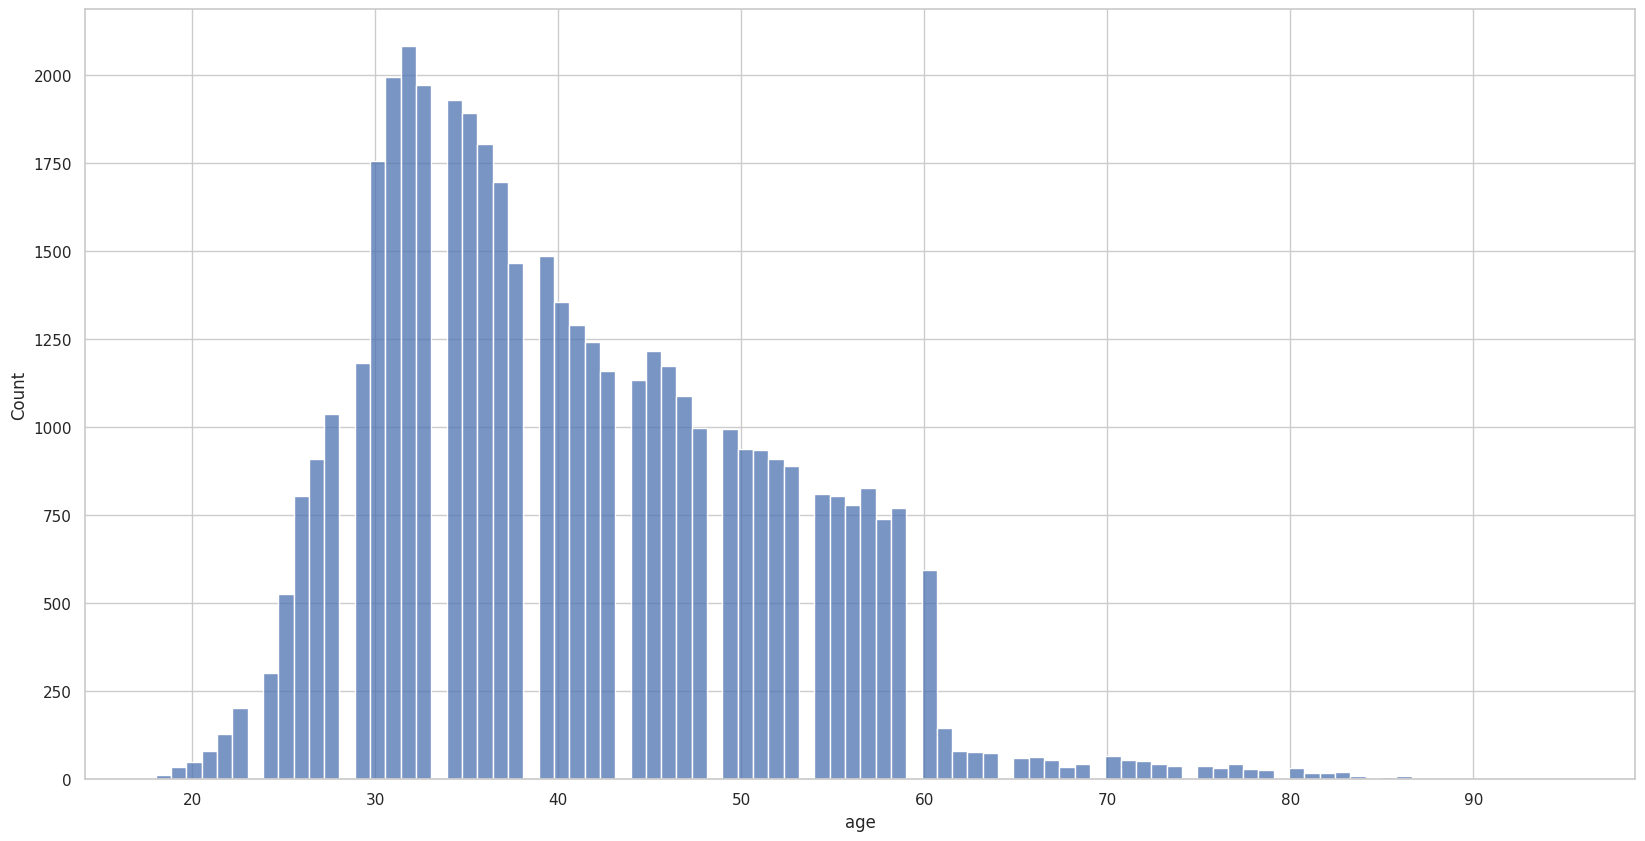

In [25]:
plt.figure(figsize=(20,10))
sns.histplot(data=data, x='age')

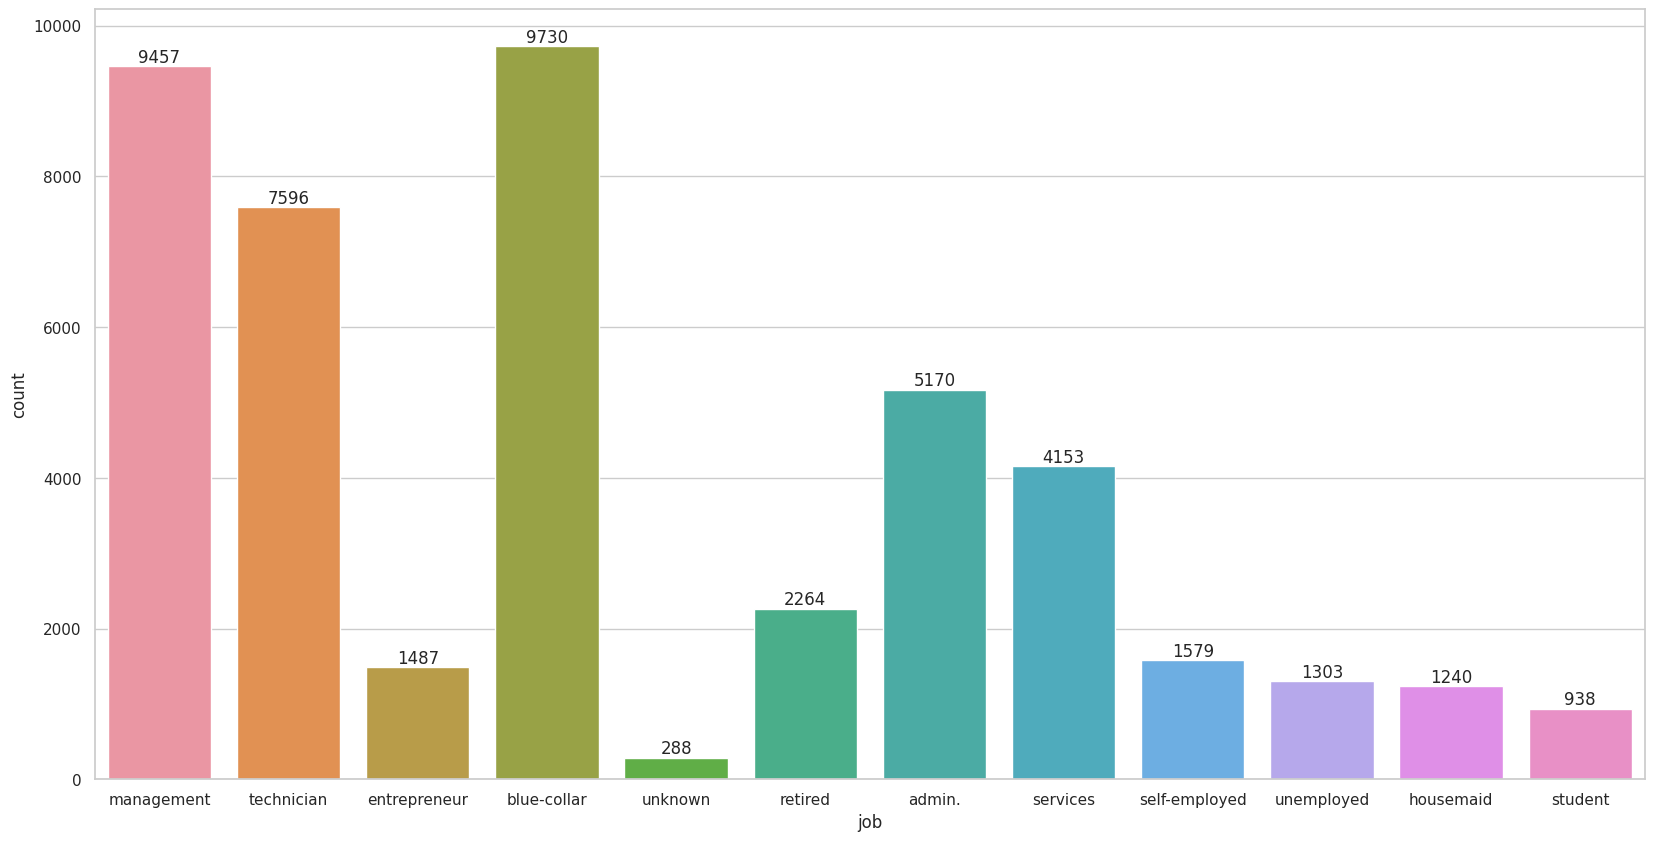

In [26]:
plt.figure(figsize=(20,10))
ax = sns.countplot(data=data, x="job")
for i in ax.containers:
  ax.bar_label(i)

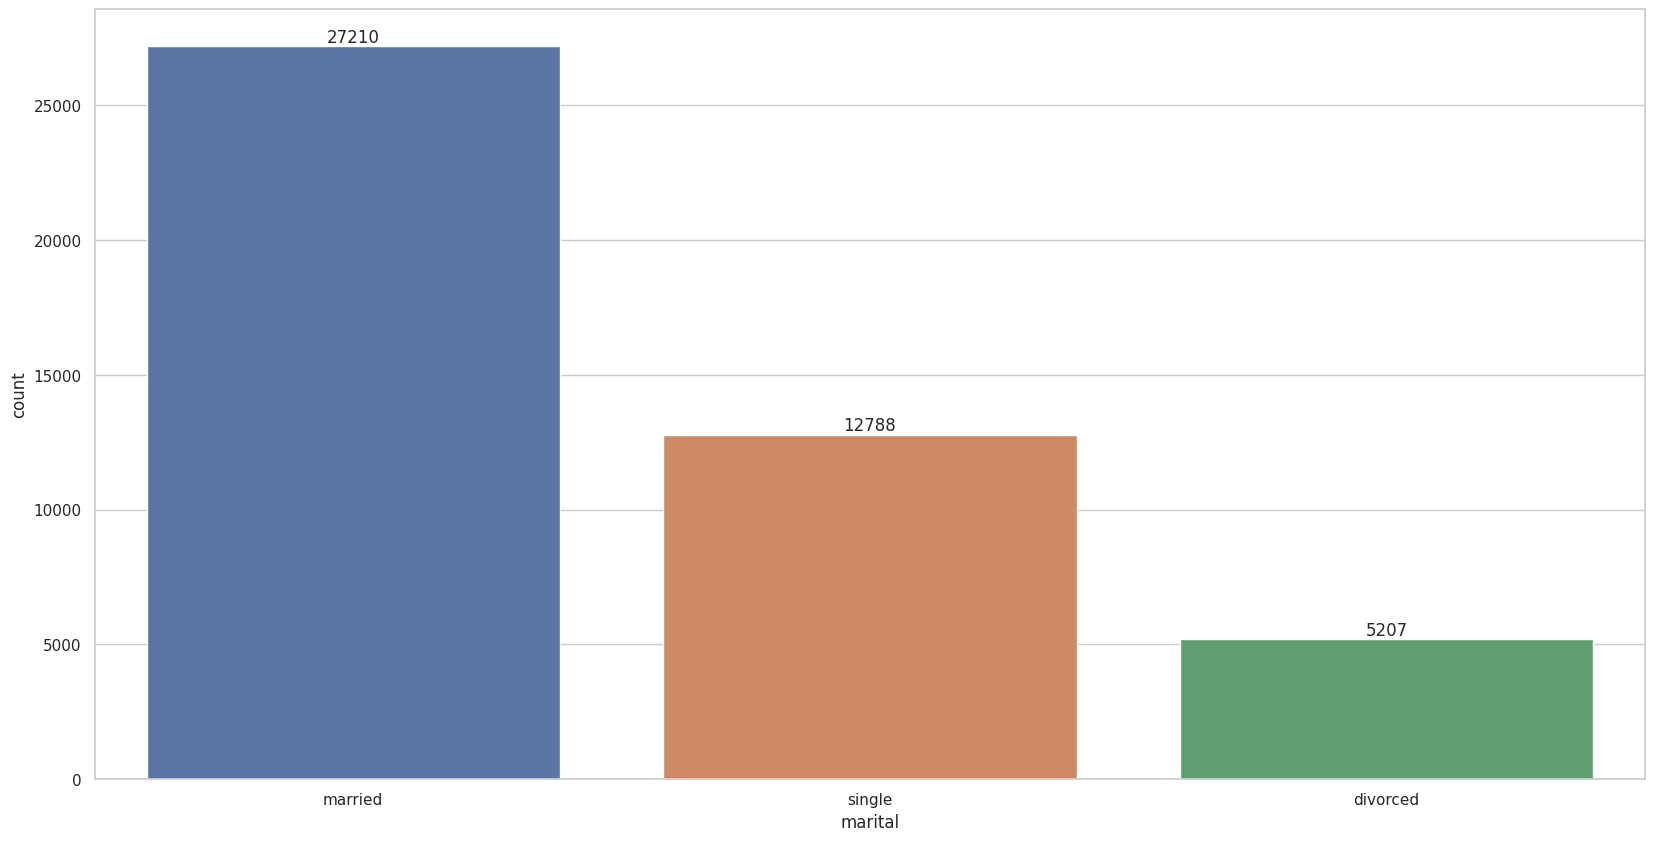

In [27]:
plt.figure(figsize=(20,10))
ax = sns.countplot(data=data, x="marital")
for i in ax.containers:
  ax.bar_label(i)

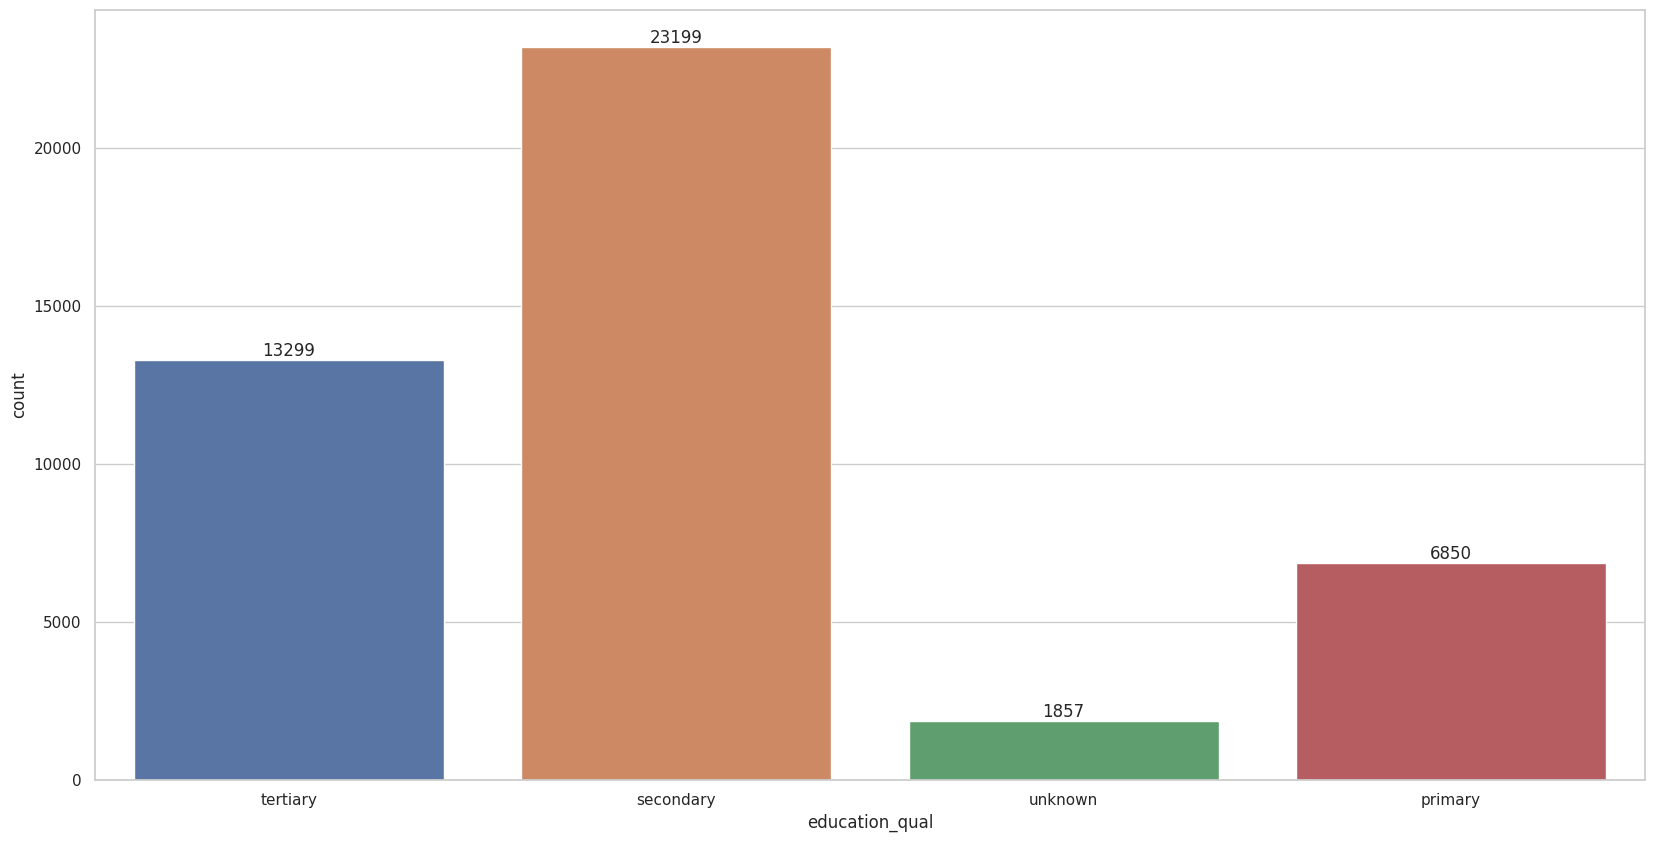

In [28]:
plt.figure(figsize=(20,10))
ax = sns.countplot(data=data, x="education_qual")
for i in ax.containers:
  ax.bar_label(i)

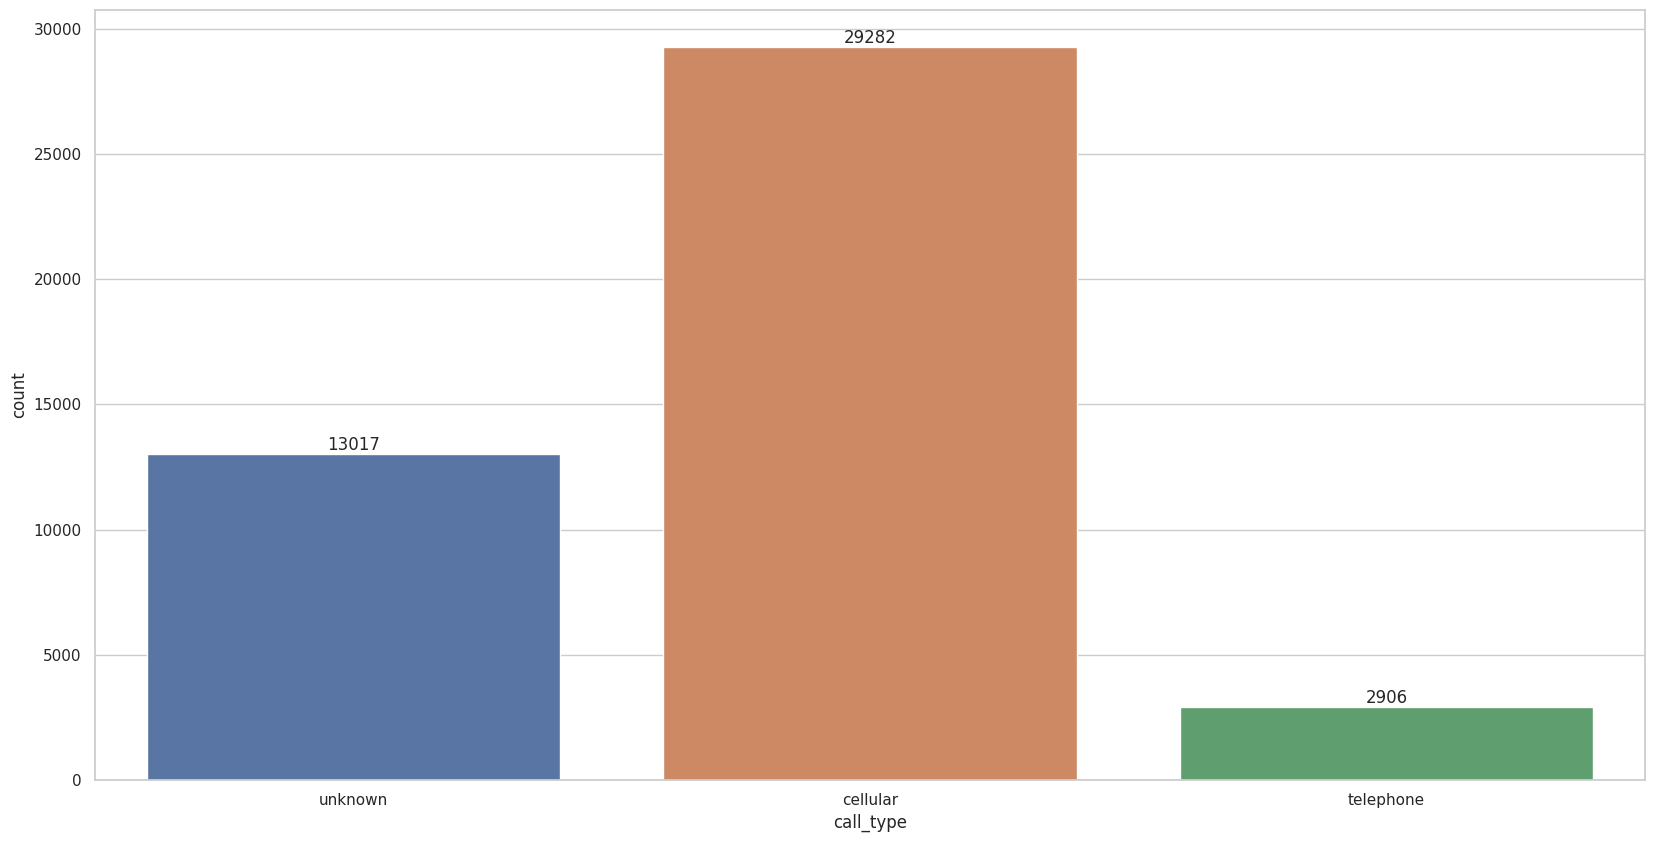

In [29]:
plt.figure(figsize=(20,10))
ax = sns.countplot(data=data, x="call_type")
for i in ax.containers:
  ax.bar_label(i)

<Axes: xlabel='day', ylabel='Count'>

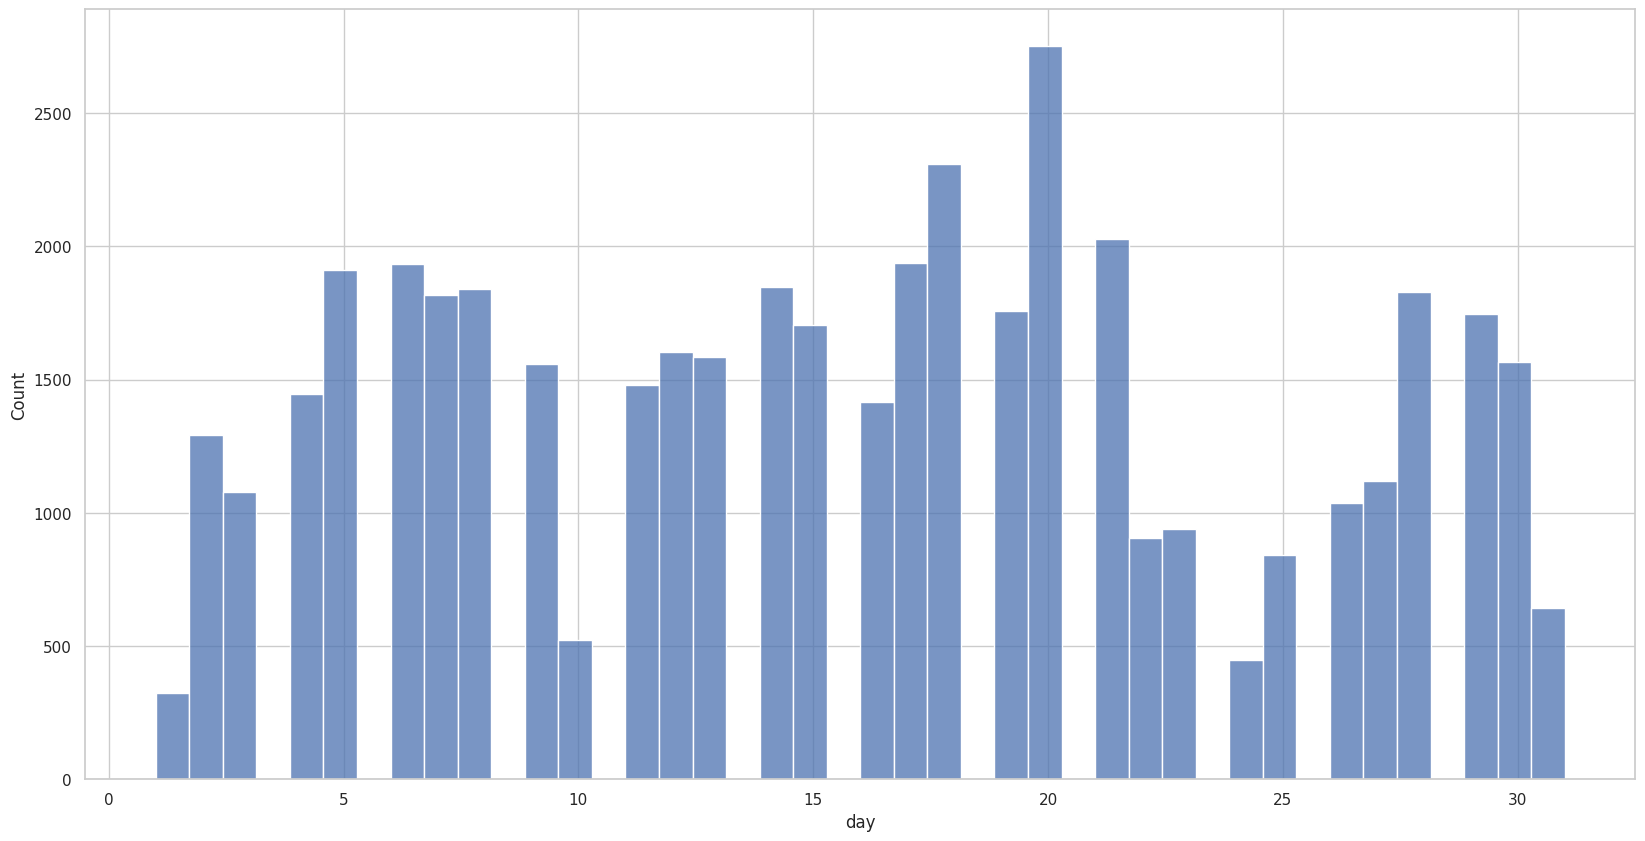

In [30]:
plt.figure(figsize=(20,10))
sns.histplot(data=data, x='day')

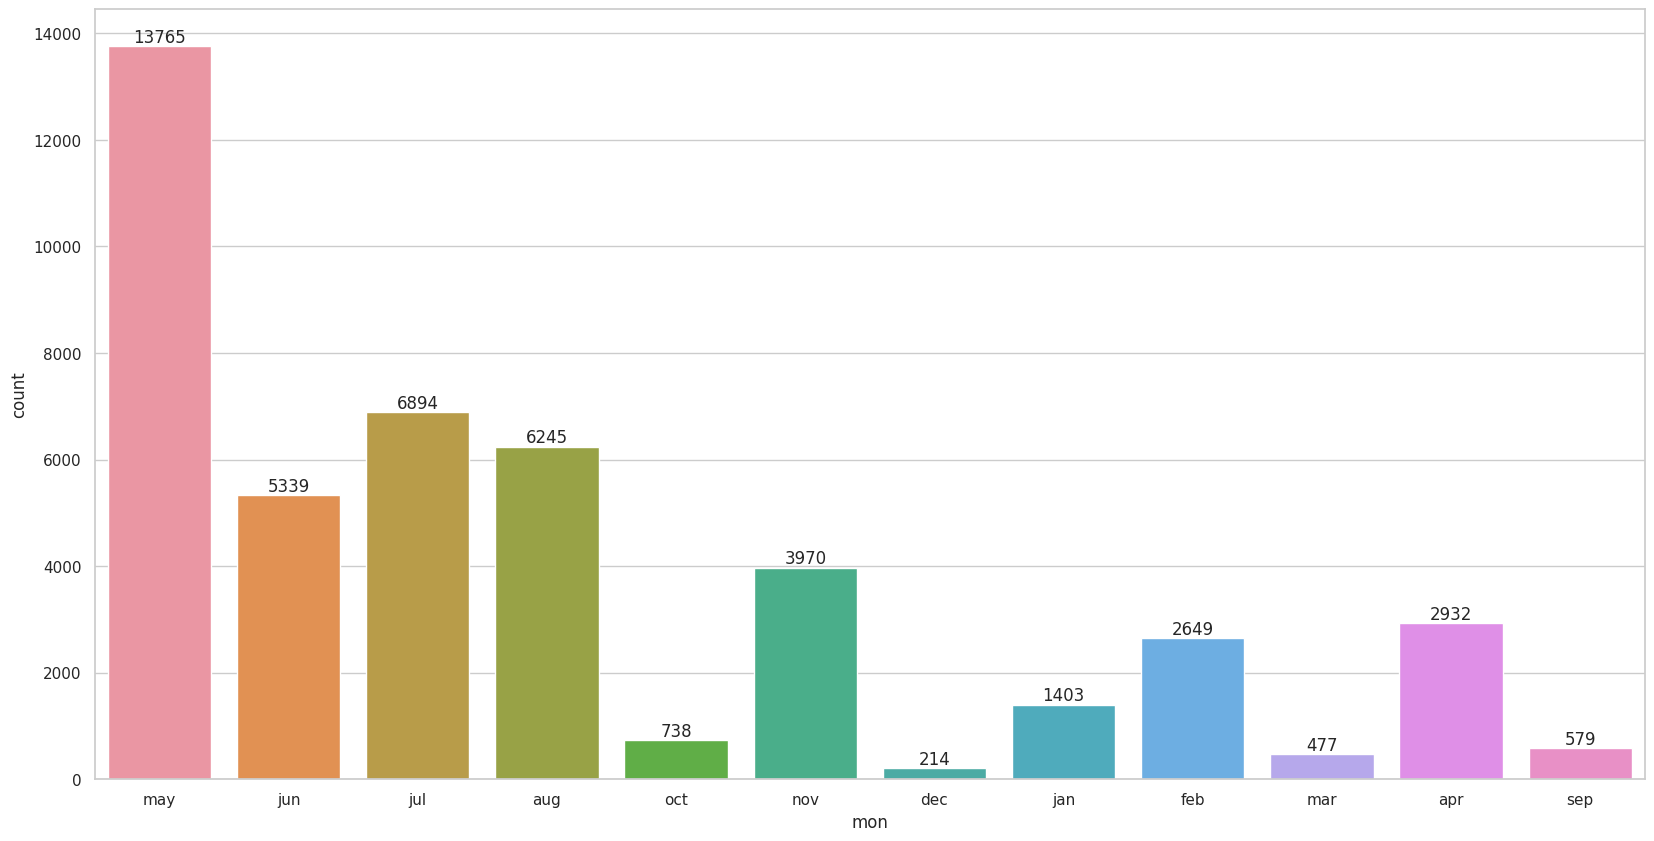

In [31]:
plt.figure(figsize=(20,10))
ax = sns.countplot(data=data, x="mon")
for i in ax.containers:
  ax.bar_label(i)

<Axes: xlabel='dur', ylabel='Count'>

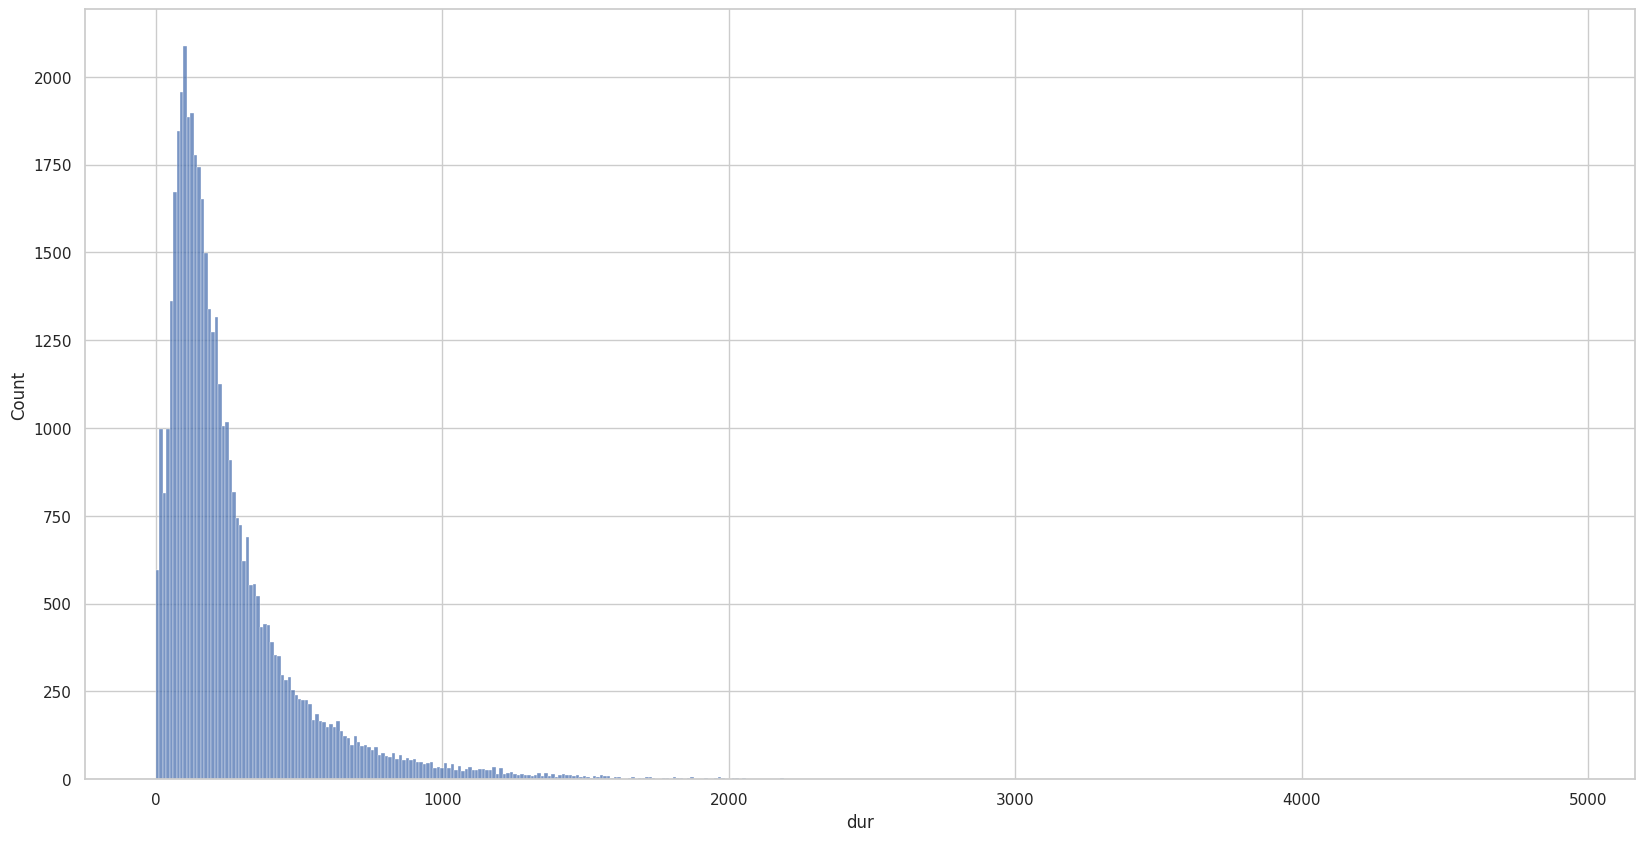

In [32]:
plt.figure(figsize=(20,10))
sns.histplot(data=data, x='dur')

<Axes: xlabel='num_calls', ylabel='Count'>

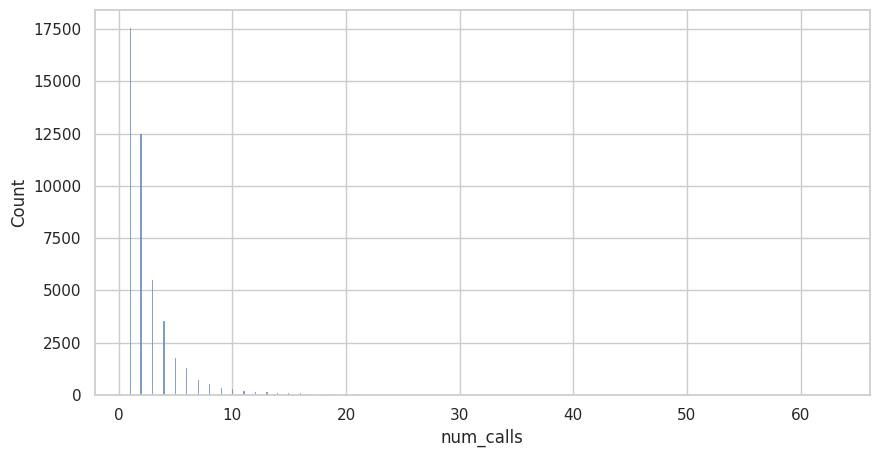

In [33]:
plt.figure(figsize=(10,5))
sns.histplot(data=data, x='num_calls')

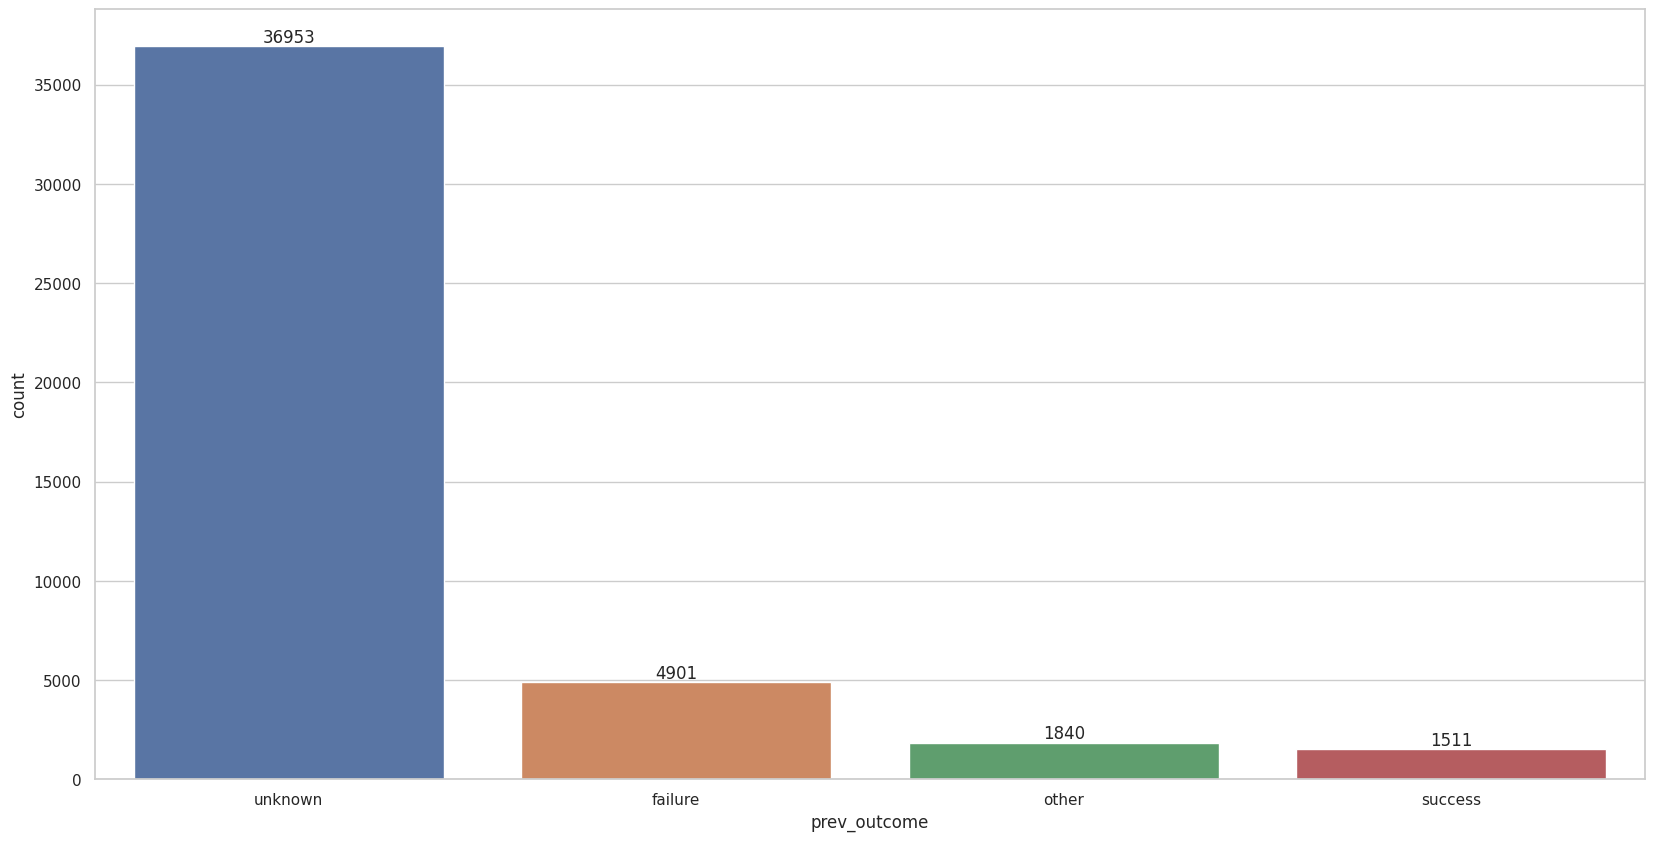

In [34]:
plt.figure(figsize=(20,10))
ax = sns.countplot(data=data, x="prev_outcome")
for i in ax.containers:
  ax.bar_label(i)

## **Dealing with Unknowns**

### **Job**

In [35]:
data.job.value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Out of 45211 rows, 288 unknown value rows are present in the 'job' column. So, I'm going to replace unknown values with blue-collar(mode)

In [36]:
data.job = data.job.replace('unknown', 'blue-collar') #replacing unknown values with blue-collar(mode)

In [37]:
data.job.value_counts()

blue-collar      10018
management        9457
technician        7596
admin.            5170
services          4153
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

### **education_qual**

In [38]:
data.education_qual.value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [39]:
print(f"percentage of unknowns in the 'education_qual' feature is:", (1730/(23128+13260+6799+1730))*100)

percentage of unknowns in the 'education_qual' feature is: 3.8515484115145715


Out of 45211 rows, 1730 rows have unknown values in this feature which contributes to 3.85% of total dataset. So, I'm replacing unknown values with secondary(mode)

In [40]:
data.education_qual = data.education_qual.replace('unknown', 'secondary')

In [41]:
data.education_qual.value_counts()

secondary    25056
tertiary     13299
primary       6850
Name: education_qual, dtype: int64

### **call_type**

In [42]:
data.call_type.value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [43]:
print("Percentage of unknown values in 'call_type' feature :", (12283/(28210+12283+2694))*100)

Percentage of unknown values in 'call_type' feature : 28.441429133767105


As about 12283 rows and about 28.44% of rows have unknown values, the values are not removed and kept as is.

### **prev_outcome**

In [44]:
data.prev_outcome.value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [45]:
print("Percentage of unknown values in 'call_type' feature :", (35280/(4709+1774+1424+35280))*100)

Percentage of unknown values in 'call_type' feature : 81.69124968161715


The 'unknow' is present in 35280 rows and about 81.69% of unknowns are present in prev_outcome feature. So, the values are kept as it is.

## **Check for Outliers**

### **Age**

<Axes: xlabel='age'>

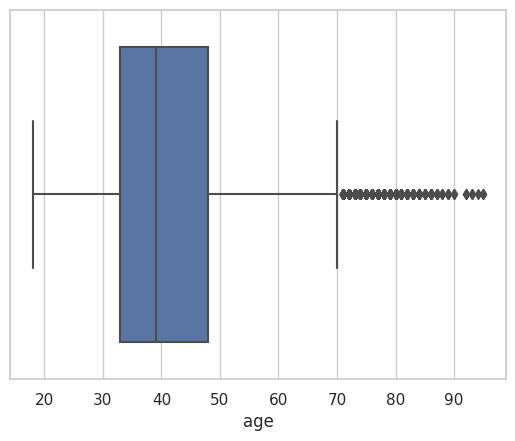

In [46]:
sns.boxplot(x = data['age'] , orient = 'h')

#### Calcualting IQR for age

In [47]:
data.age.describe()

count    45205.000000
mean        40.937087
std         10.619130
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [48]:
q3 = data.age.quantile(0.75)
q1 = data.age.quantile(0.25)
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper Threshold:",upper,"Lower Threshold:", lower)

Upper Threshold: 70.5 Lower Threshold: 10.5


From the box plot and IQR, Outliers are detected and it should be corrected

In [49]:
data.age = data.age.clip(10.5, 70.5) #replacing outliers with lower/upper threshold using clip function 

In [50]:
data.age.describe()

count    45205.000000
mean        40.869052
std         10.395247
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.500000
Name: age, dtype: float64

<Axes: xlabel='age'>

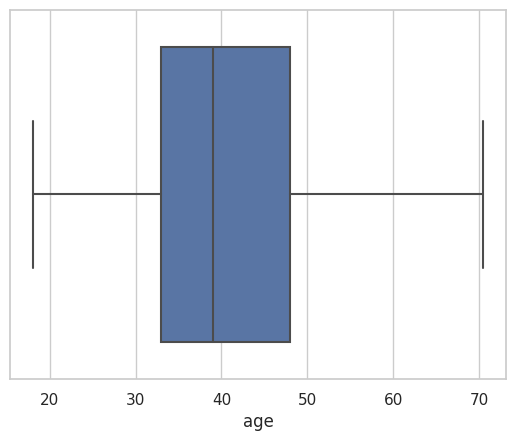

In [51]:
sns.boxplot(x = data['age'], orient='h')

### day

In [52]:
data.day.describe()

count    45205.00000
mean        15.80688
std          8.32234
min          1.00000
25%          8.00000
50%         16.00000
75%         21.00000
max         31.00000
Name: day, dtype: float64

<Axes: xlabel='day'>

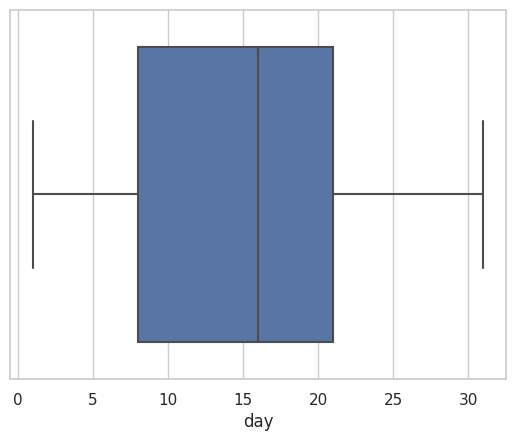

In [53]:
sns.boxplot(x=data['day'], orient= 'h')

Box plot shows that 'day' feature has no Outliers

### Duration (dur)

<Axes: xlabel='dur'>

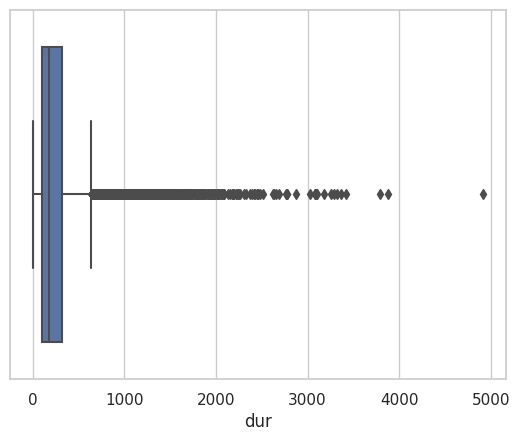

In [54]:
sns.boxplot(x=data['dur'], orient= 'h')

The Box plot shows that it has lots of Outliers

In [55]:
data.dur.describe()

count    45205.000000
mean       258.183055
std        257.538504
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: dur, dtype: float64

#### Calculating IQR

In [56]:
q3 = data.dur.quantile(0.75)
q1 = data.dur.quantile(0.25)
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper Threshold:",upper,"Lower Threshold:", lower)

Upper Threshold: 643.0 Lower Threshold: -221.0


In [57]:
data.dur = data.dur.clip(-219.5, 640.5) #replacing outliers with lower/upper threshold using clip function 

In [58]:
data.dur.describe()

count    45205.000000
mean       234.776131
std        176.339754
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max        640.500000
Name: dur, dtype: float64

<Axes: xlabel='dur'>

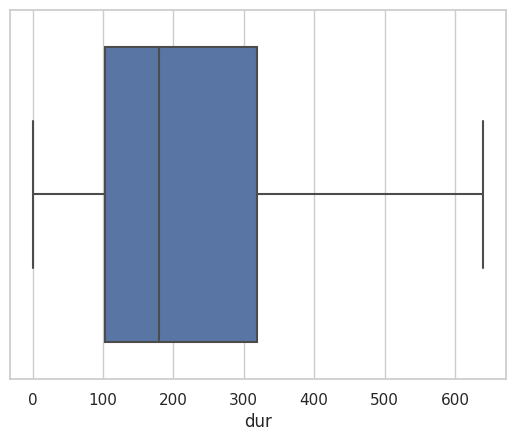

In [59]:
sns.boxplot(x=data['dur'], orient= 'h')

### Number of Calls (num_calls)

<Axes: xlabel='num_calls'>

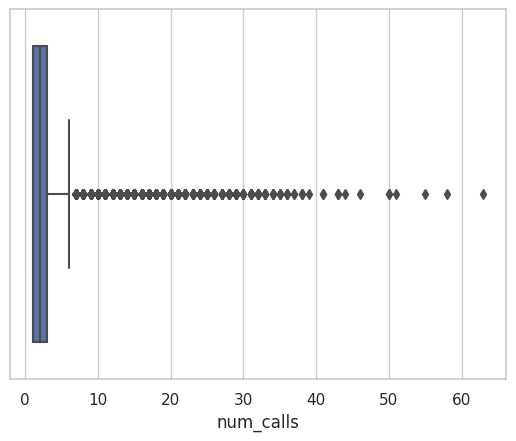

In [60]:
sns.boxplot(x=data['num_calls'], orient= 'h')

The boxplot shows that it has outliers

In [61]:
data.num_calls.describe()

count    45205.000000
mean         2.763898
std          3.098189
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: num_calls, dtype: float64

In [62]:
q3 = data.num_calls.quantile(0.75)
q1 = data.num_calls.quantile(0.25)
IQR = q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper Threshold:",upper,"Lower Threshold:", lower)

Upper Threshold: 6.0 Lower Threshold: -2.0


In [63]:
data.num_calls = data.num_calls.clip(-2.0, 6.0) #replacing outliers with lower/upper threshold using clip function 

In [64]:
data.num_calls.describe()

count    45205.000000
mean         2.392235
std          1.600152
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_calls, dtype: float64

<Axes: xlabel='num_calls'>

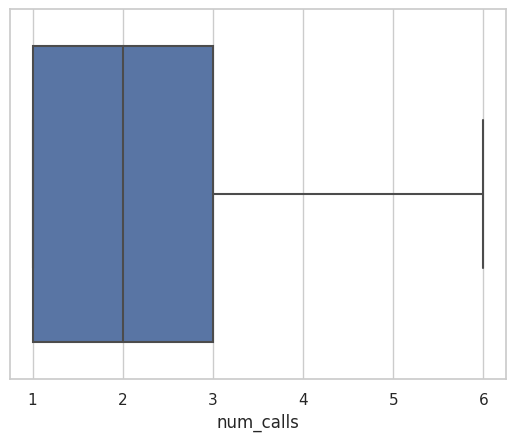

In [65]:
sns.boxplot(x=data['num_calls'], orient= 'h')

# **EDA**

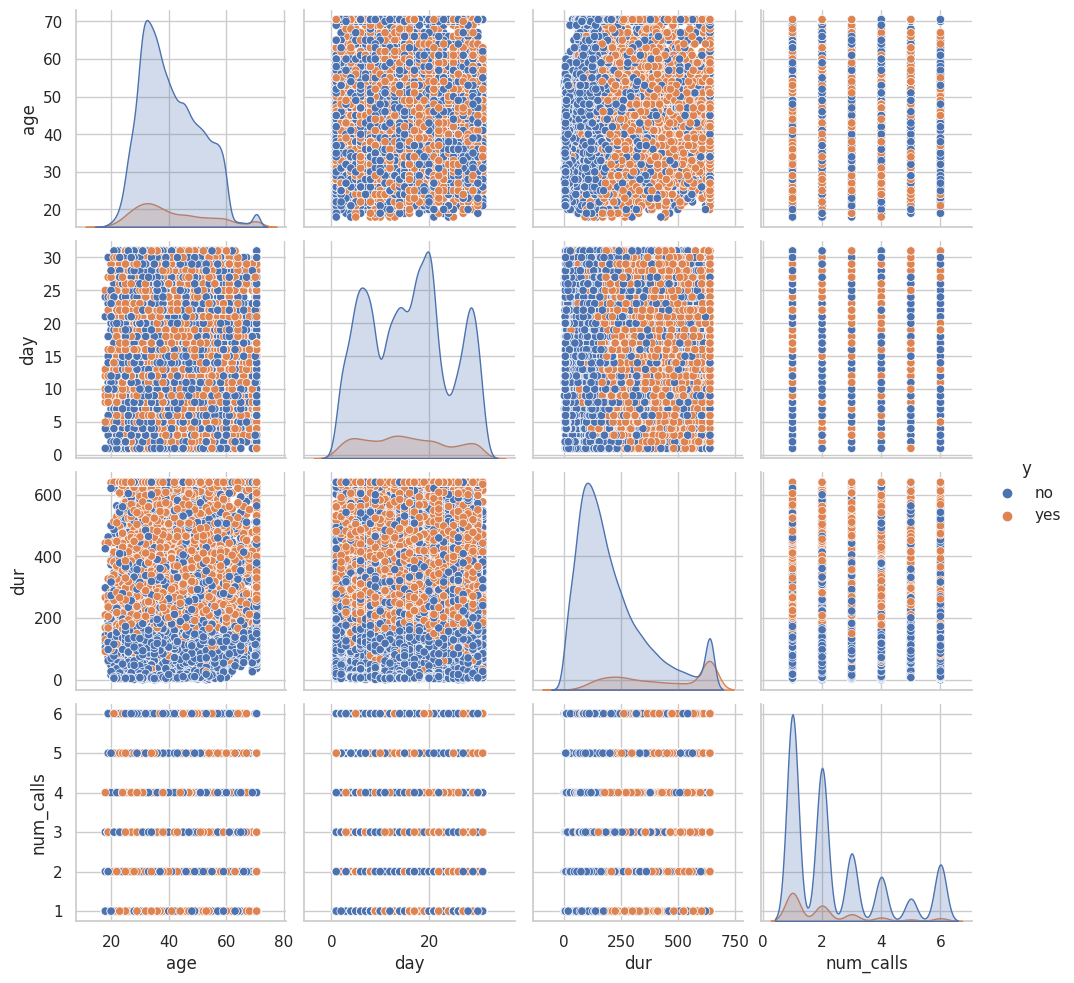

In [66]:
sns.pairplot(data=data,hue='y')

## **Percentage Distribution of Categorical Features**

Text(0.5, 1.0, 'Previous outcome')

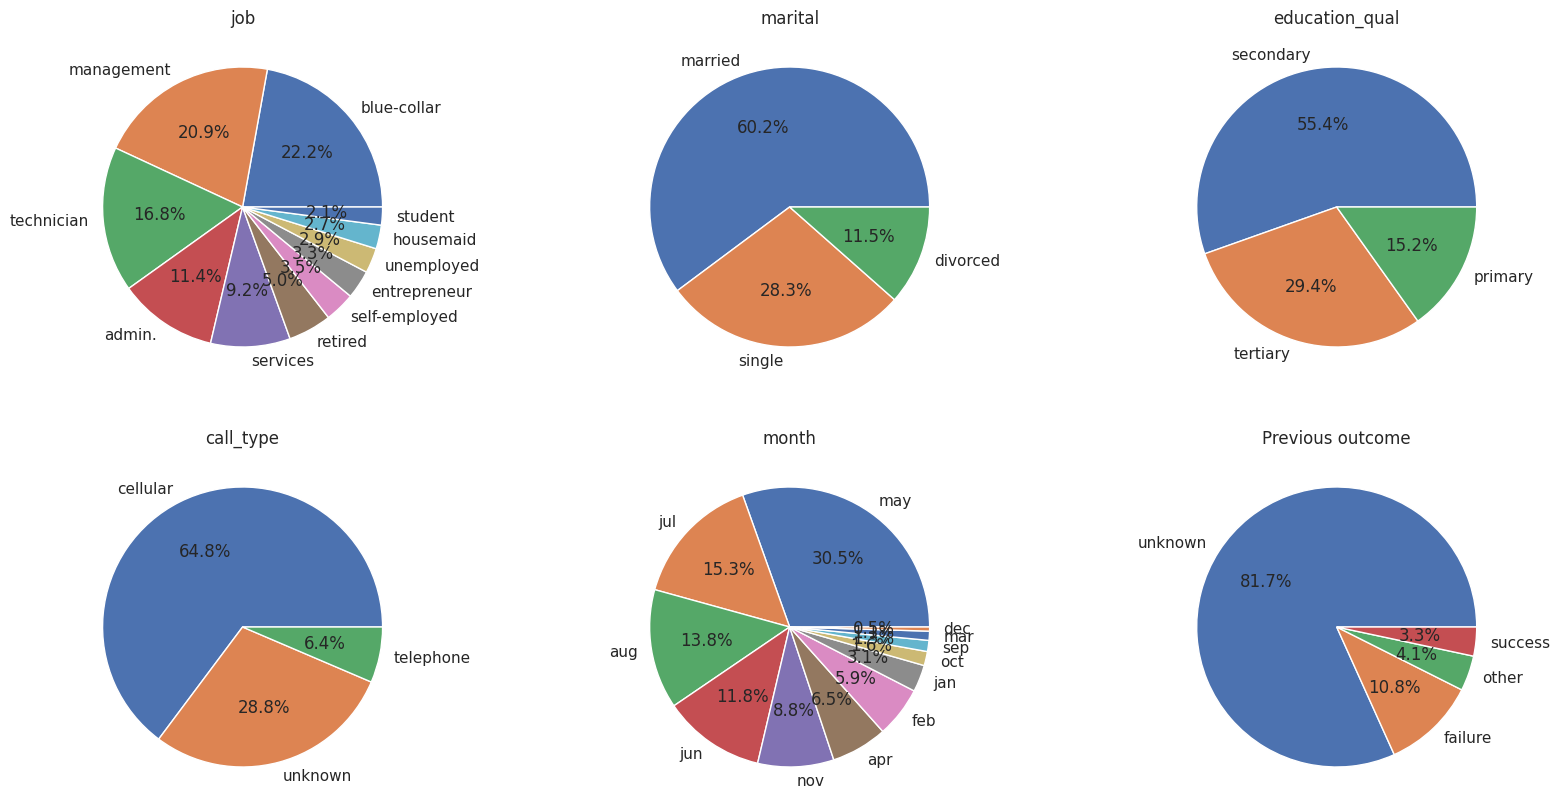

In [67]:
plt.figure(figsize=(20,10))

#Percentage Distribution of job
plt.subplot(231)
df_source = data.job.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['job'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('job')

#Percentage Distribution of marital
plt.subplot(232)
df_source = data.marital.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['marital'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('marital')

#Percentage Distribution of education_qual
plt.subplot(233)
df_source = data.education_qual.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['education_qual'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('education_qual')

#Percentage Distribution of call_type
plt.subplot(234)
df_source = data.call_type.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['call_type'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('call_type')

#Percentage Distribution of month
plt.subplot(235)
df_source = data.mon.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['mon'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('month')

#Percentage Distribution of previous outcome
plt.subplot(236)
df_source = data.prev_outcome.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['prev_outcome'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Previous outcome')

## **Categorical Features vs Target**

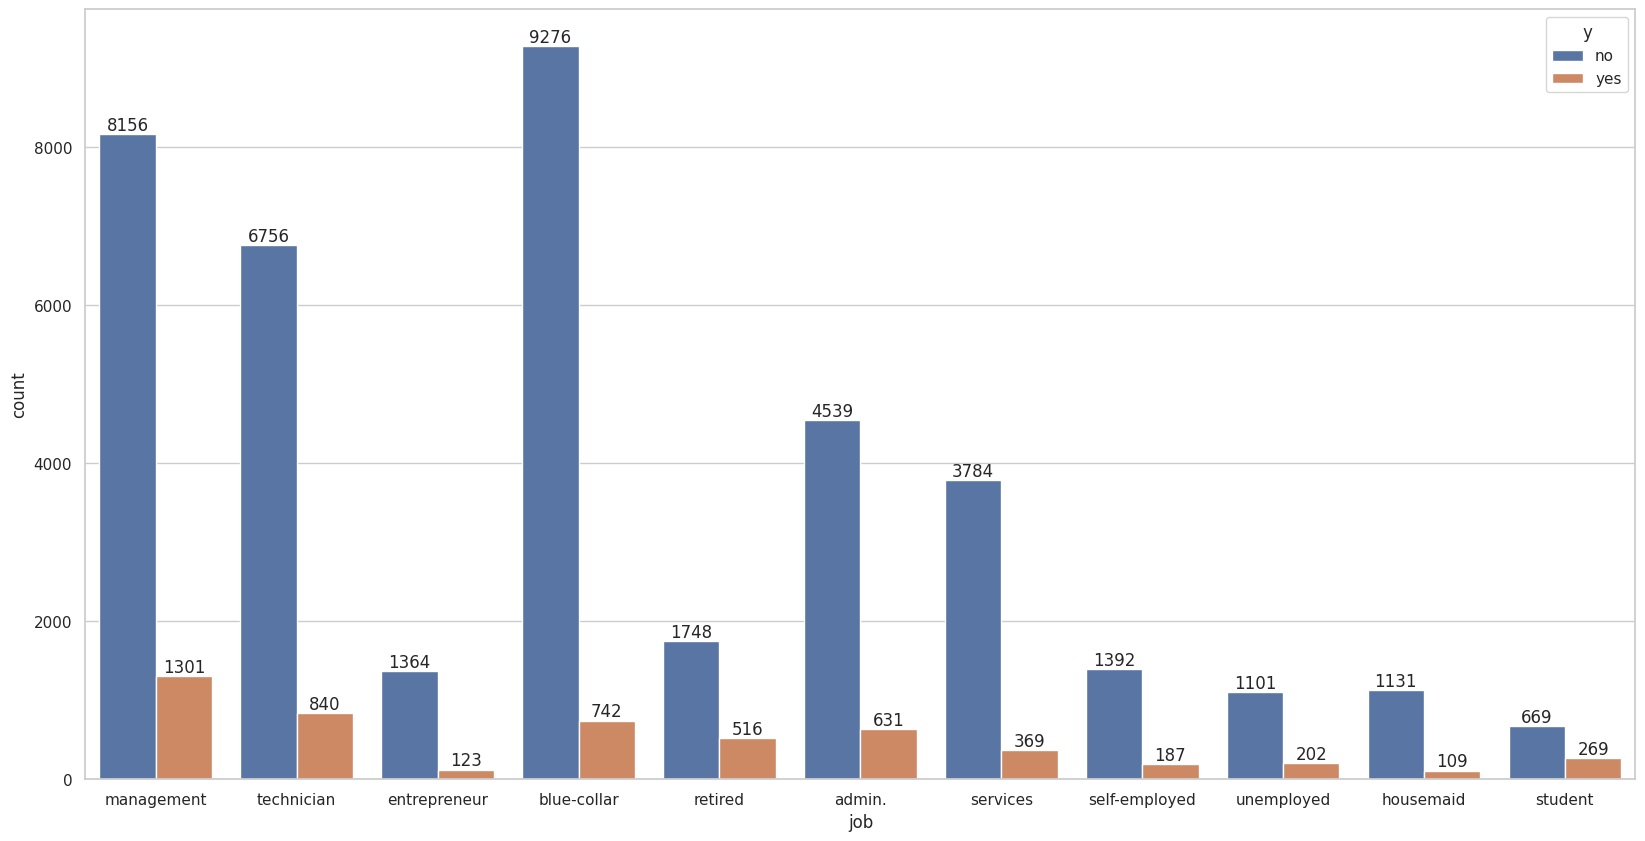

In [68]:
plt.figure(figsize=(20,10))
ax = sns.countplot(data=data, x="job", hue="y")
for i in ax.containers:
  ax.bar_label(i)

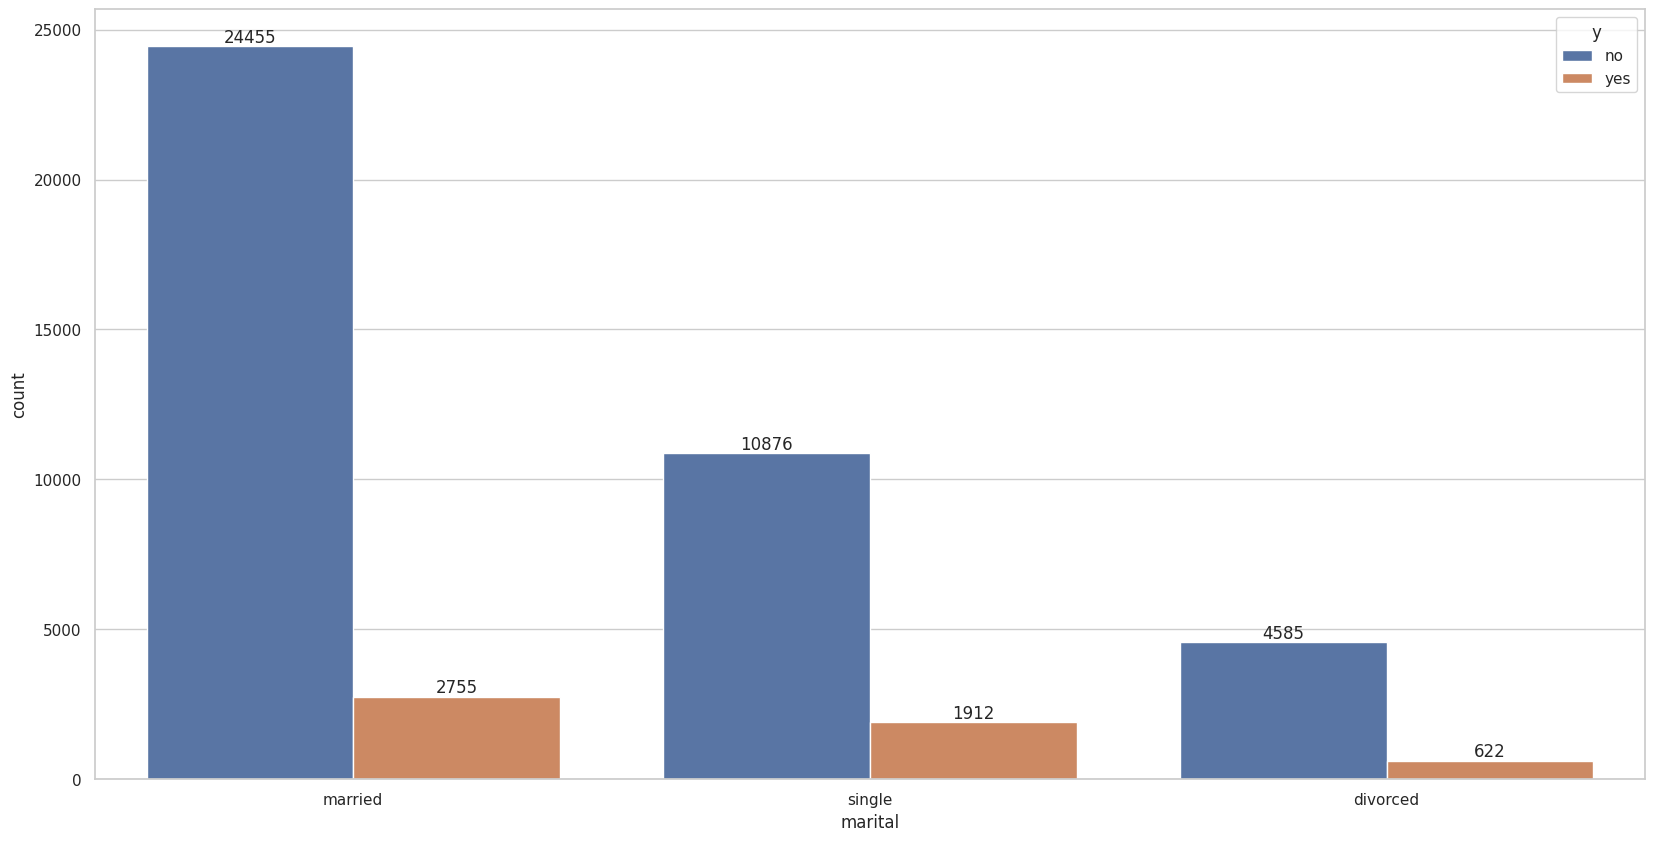

In [69]:
plt.figure(figsize=(20,10))
ax = sns.countplot(data=data, x="marital", hue="y")
for i in ax.containers:
  ax.bar_label(i)

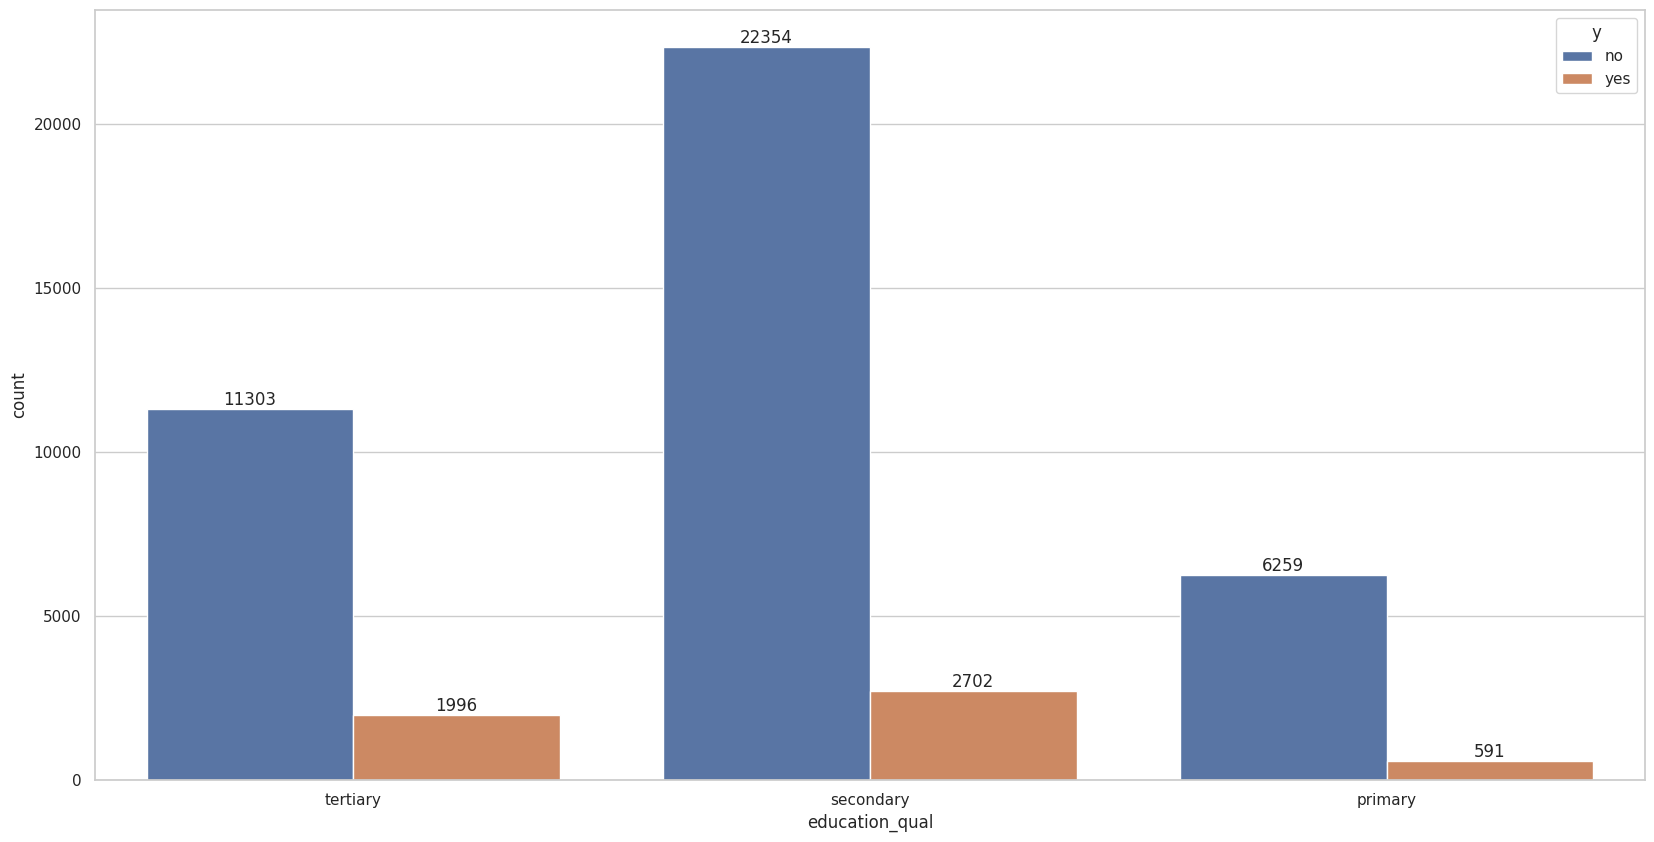

In [70]:
plt.figure(figsize=(20,10))
ax = sns.countplot(data=data, x="education_qual", hue="y")
for i in ax.containers:
  ax.bar_label(i)

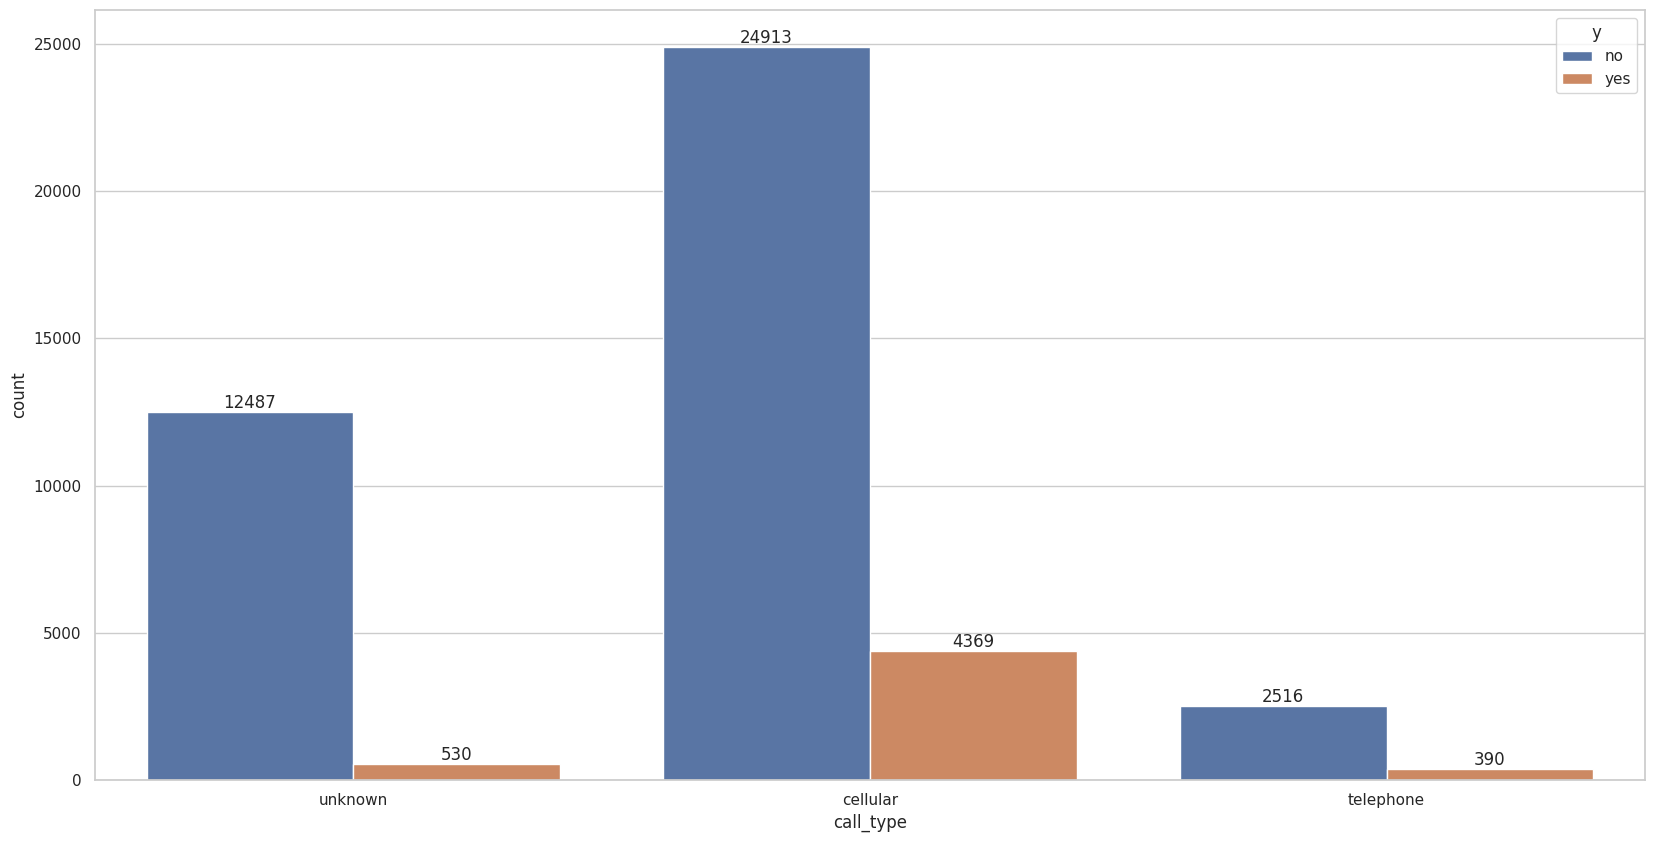

In [71]:
plt.figure(figsize=(20,10))
ax = sns.countplot(data=data, x="call_type", hue="y")
for i in ax.containers:
  ax.bar_label(i)

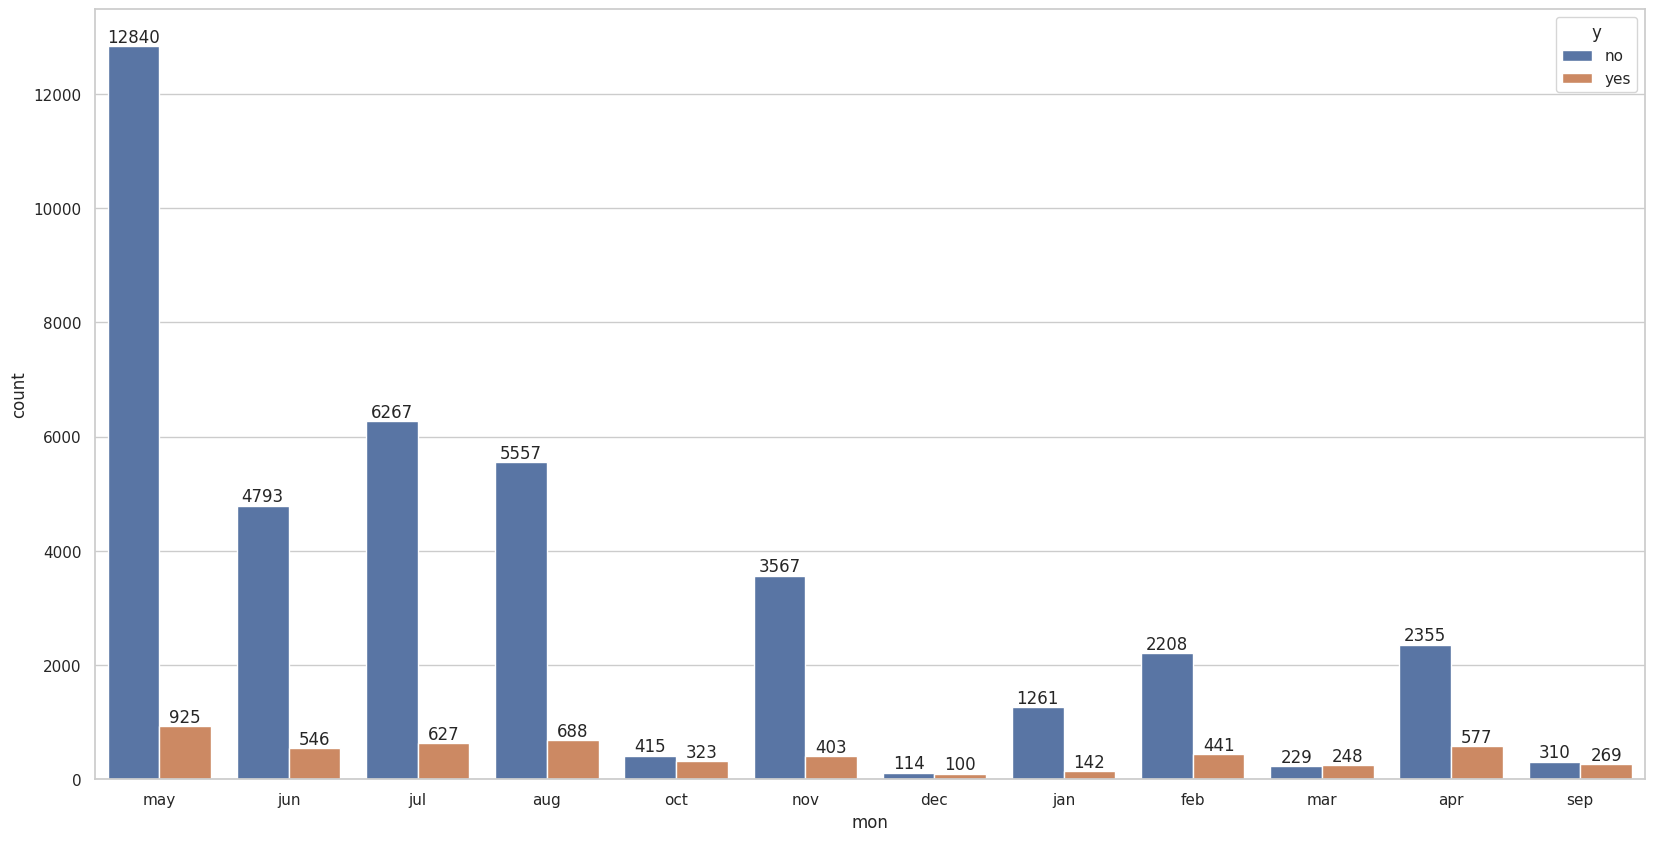

In [72]:
plt.figure(figsize=(20,10))
ax = sns.countplot(data=data, x="mon", hue="y")
for i in ax.containers:
  ax.bar_label(i)

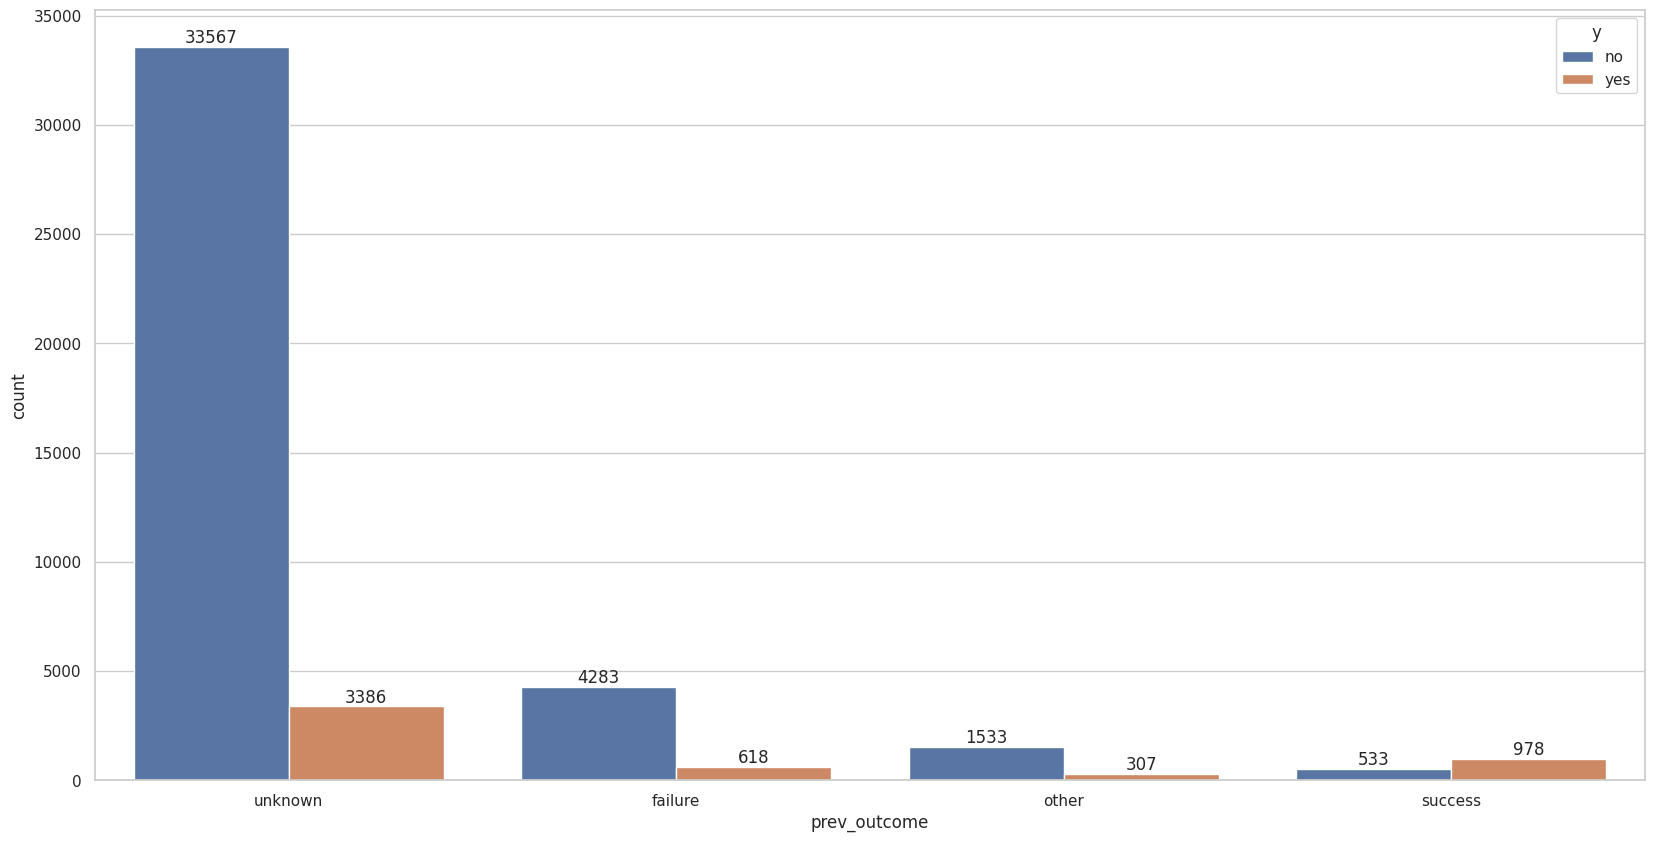

In [73]:
plt.figure(figsize=(20,10))
ax = sns.countplot(data=data, x="prev_outcome", hue="y")
for i in ax.containers:
  ax.bar_label(i)

### **KEY FINDINGS**


1.   Blue collar job peoples are mostly targeted by the bank officials followed by management professionals. Management professionals were converted successfully as a customer followed by technicians and admins. So, they have to target more technicians and admins as they have more success on customer conversion than blue collar job professionals.
2. Bank professionals contacted married people the most followed by singles and divorced people. But, the coustomer conversion success percent is more for singles(14.8%) followed by divorced (11.9%) and married has low 10% success. So, I suggest to target more singles and divorced people also.
3. In the case of education_qual, Bank professionals contacted secondary qualified people the most followed by tertiary and primary  qualified people. But, the coustomer conversion success percent is more for tertiary qualified people(15%) followed by secondary qualified (10.5%). So, I suggest to target more tertiary qualified people also.
4. Bnak professionals contacted via cell phones and have found successs in that.  
5. Bank professionals contacted people mostly in may month as also found succcess in that followed by july. But August month have the 2nd most customer conversion success than july so, I suggest to cintact more people in August also.
6. Most of the previous outcomes are recorded as "unknown" followed by "Failure". As "First impression is the Best impression" they need to track the previous outcomes and try to improve the customer conversion rate.






## **Continous Features vs Target**

<Axes: xlabel='age', ylabel='Density'>

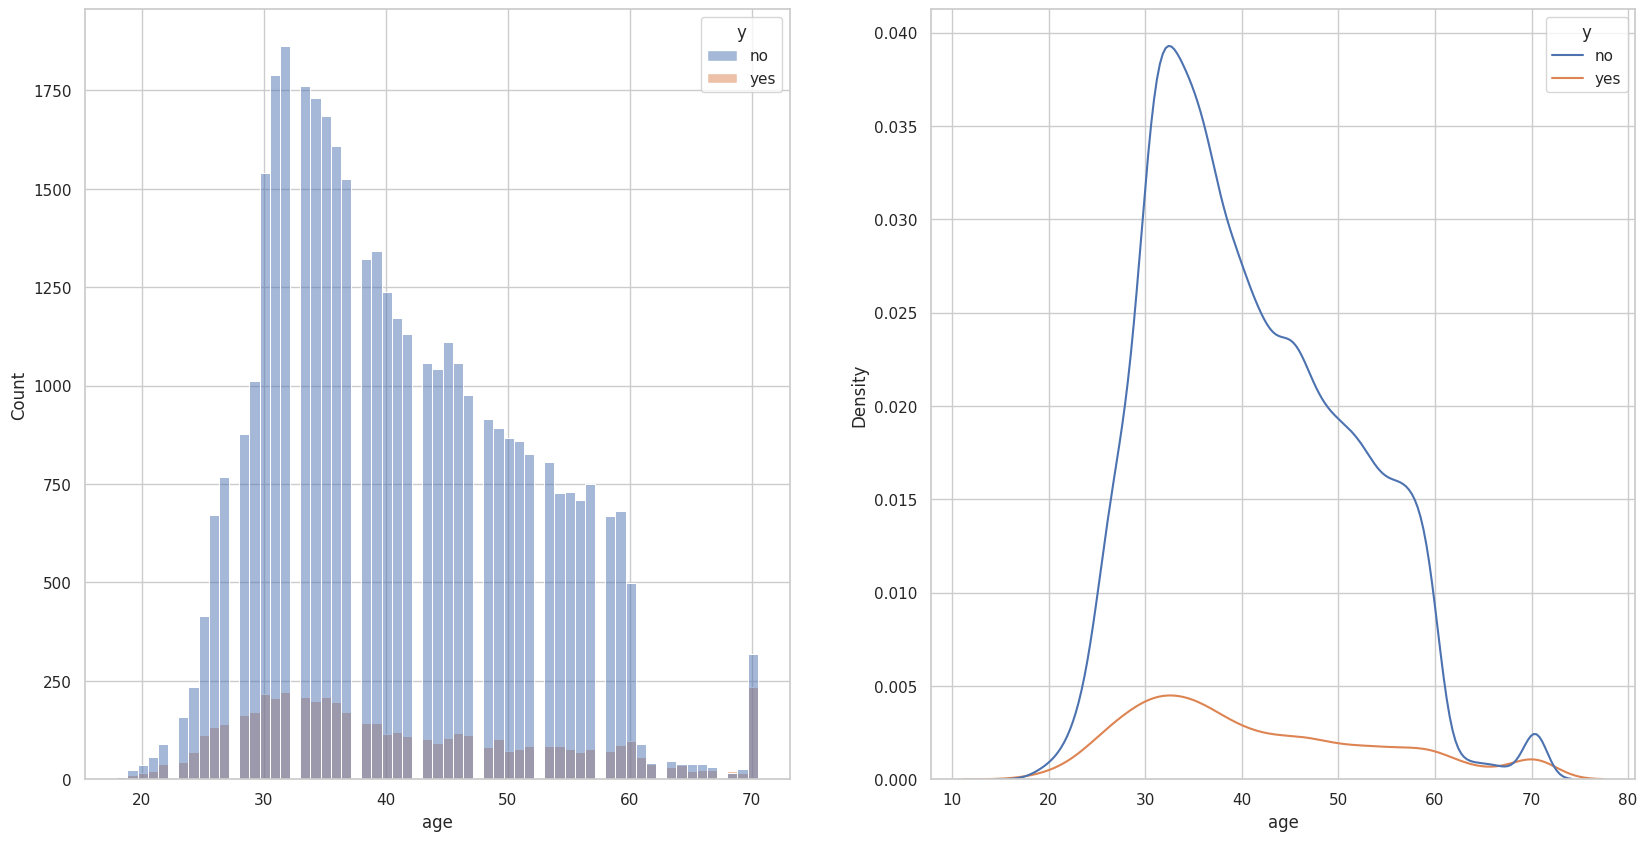

In [74]:
plt.figure(figsize=(20,10))

plt.subplot(121)
sns.histplot(data=data, x='age', hue='y')

plt.subplot(122)
sns.kdeplot(data=data, x="age", hue="y")

<Axes: xlabel='day', ylabel='Density'>

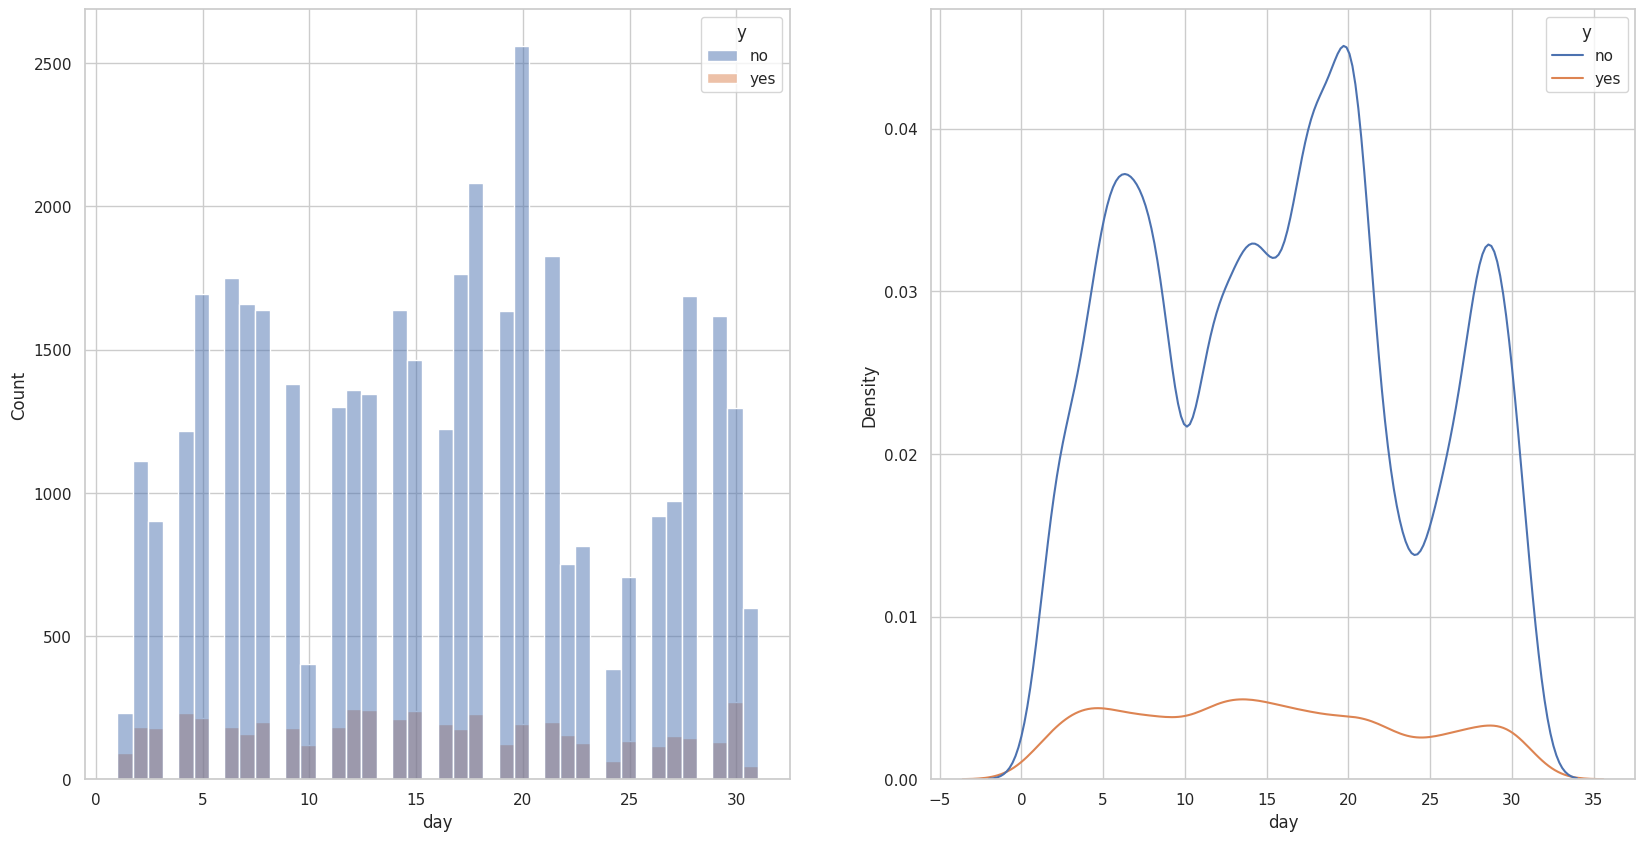

In [75]:
plt.figure(figsize=(20,10))

plt.subplot(121)
sns.histplot(data=data, x='day', hue='y')

plt.subplot(122)
sns.kdeplot(data=data, x="day", hue="y")

<Axes: xlabel='dur', ylabel='Density'>

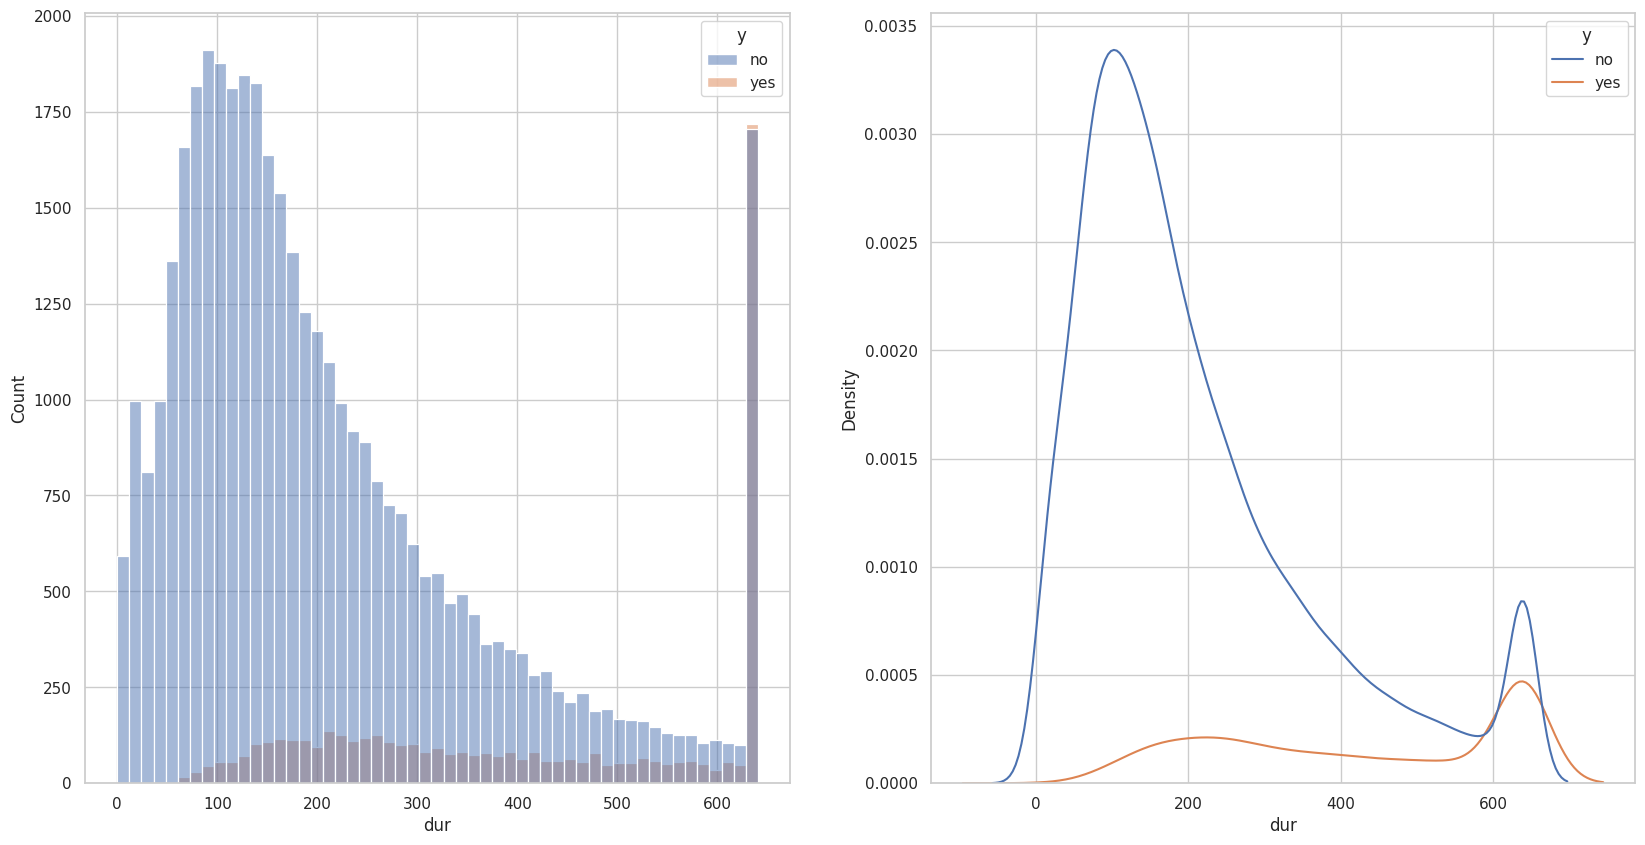

In [76]:
plt.figure(figsize=(20,10))

plt.subplot(121)
sns.histplot(data=data, x='dur', hue='y')

plt.subplot(122)
sns.kdeplot(data=data, x="dur", hue="y")

<Axes: xlabel='num_calls', ylabel='Density'>

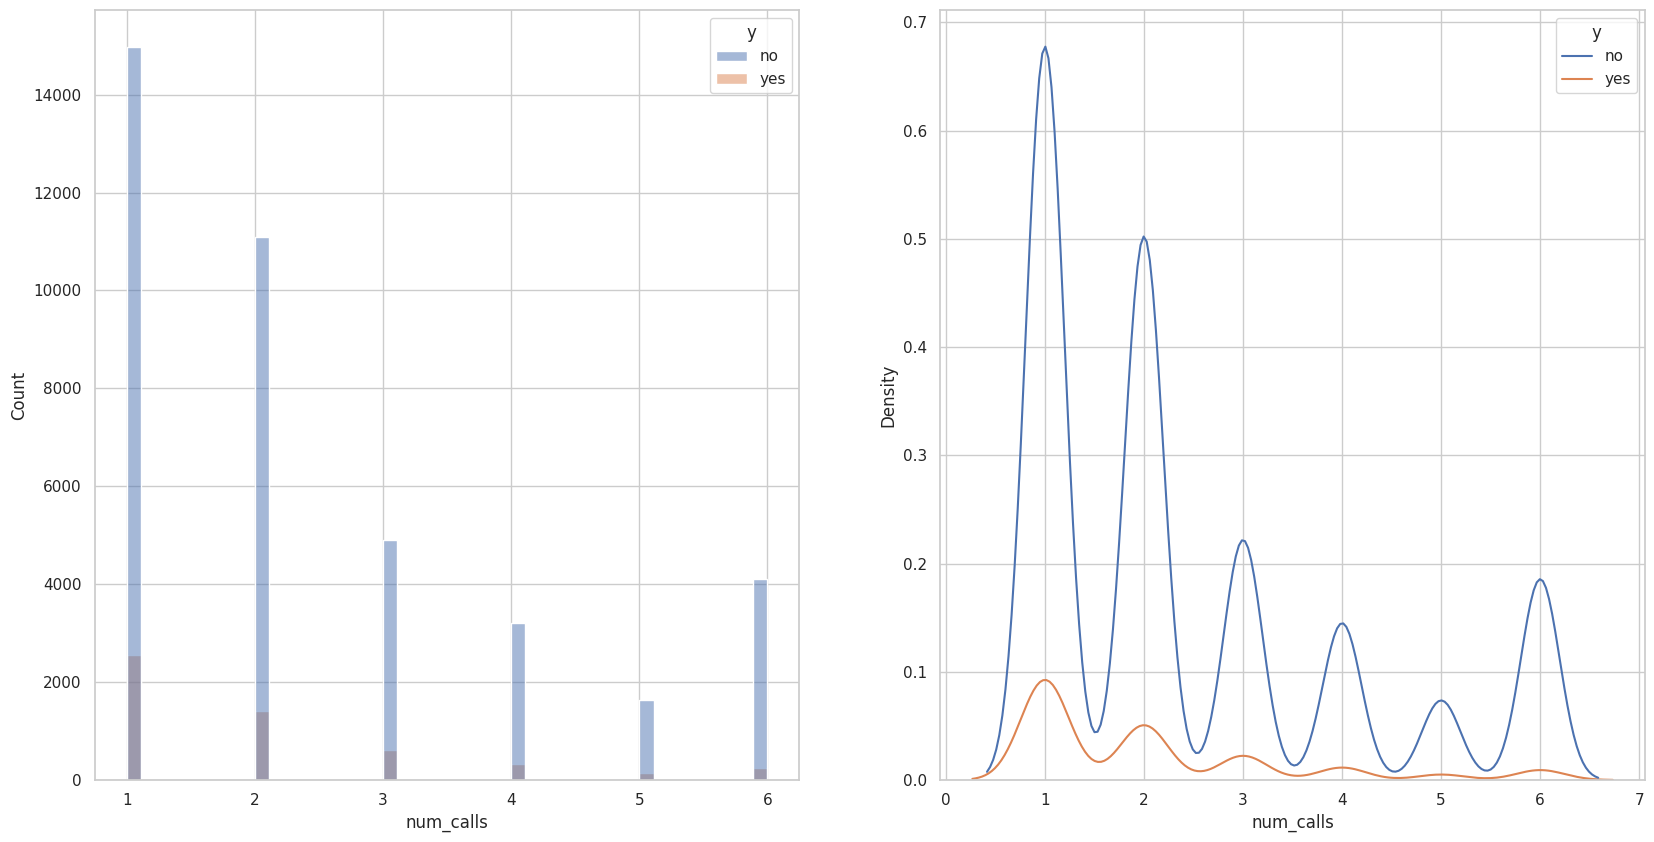

In [77]:
plt.figure(figsize=(20,10))

plt.subplot(121)
sns.histplot(data=data, x='num_calls', hue='y')

plt.subplot(122)
sns.kdeplot(data=data, x="num_calls", hue="y")

# **Encoding**

It is recommended to always use Label encoding for Decision Tree

In [78]:
data.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [79]:
data.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [80]:
# Encoding 'job'
data.job = data.job.map({'blue-collar':1,'entrepreneur':2,'services':3,'housemaid':4,'technician':5,'self-employed':6,'admin.':7,'management':8, 'unemployed':9, 'retired': 10, 'student' : 11})   
data.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,married,tertiary,unknown,5,may,261.0,1.0,unknown,no
1,44.0,5,single,secondary,unknown,5,may,151.0,1.0,unknown,no
2,33.0,2,married,secondary,unknown,5,may,76.0,1.0,unknown,no


In [81]:
# Encoding 'marital'
data.marital = data.marital.map({'married':1, 'divorced':2, 'single':3})
data.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,1,tertiary,unknown,5,may,261.0,1.0,unknown,no
1,44.0,5,3,secondary,unknown,5,may,151.0,1.0,unknown,no
2,33.0,2,1,secondary,unknown,5,may,76.0,1.0,unknown,no


In [82]:
# Encoding 'education_qual'
data.education_qual = data.education_qual.map({'primary':1, 'secondary':2, 'tertiary':3})
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,1,3,unknown,5,may,261.0,1.0,unknown,no
1,44.0,5,3,2,unknown,5,may,151.0,1.0,unknown,no
2,33.0,2,1,2,unknown,5,may,76.0,1.0,unknown,no
3,47.0,1,1,2,unknown,5,may,92.0,1.0,unknown,no
4,33.0,1,3,2,unknown,5,may,198.0,1.0,unknown,no


In [83]:
# Encoding 'call_type'
data.call_type = data.call_type.map({'unknown': 1, 'telephone' : 2, 'cellular' : 3})

In [84]:
# Encoding 'mon'
data.mon = data.mon.map({'may': 1, 'jul' : 2, 'jan': 3, 'nov': 4, 'jun' : 5, 'aug' : 6, 'feb' : 7, 'apr' : 8, 'oct' : 9, 'dec' : 10 , 'sep': 11, 'mar': 12})
data.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,1,3,1,5,1,261.0,1.0,unknown,no
1,44.0,5,3,2,1,5,1,151.0,1.0,unknown,no
2,33.0,2,1,2,1,5,1,76.0,1.0,unknown,no


In [85]:
# Encoding 'prev_outcome'
data.prev_outcome = data.prev_outcome.map({'unknown' : 1, 'failure' : 2, 'other' : 3, 'success': 4})
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,1,3,1,5,1,261.0,1.0,1,no
1,44.0,5,3,2,1,5,1,151.0,1.0,1,no
2,33.0,2,1,2,1,5,1,76.0,1.0,1,no
3,47.0,1,1,2,1,5,1,92.0,1.0,1,no
4,33.0,1,3,2,1,5,1,198.0,1.0,1,no


In [86]:
# Encoding 'y'
data.y = data.y.map({'no' : 0, 'yes' : 1})
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,1,3,1,5,1,261.0,1.0,1,0
1,44.0,5,3,2,1,5,1,151.0,1.0,1,0
2,33.0,2,1,2,1,5,1,76.0,1.0,1,0
3,47.0,1,1,2,1,5,1,92.0,1.0,1,0
4,33.0,1,3,2,1,5,1,198.0,1.0,1,0


# **Feature and Target Selection**

In [87]:
data.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [88]:
x = data[['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome']].values
y = data['y'].values

# **Splitting**

In [89]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 3 )

# **Balancing the Data**

It is always recommended to use SMOTE and Tomek link technique(SMOTE+ENN) which is a combination of cluster centroid(US) and SMOTE(OS)

In [90]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [91]:
from imblearn.combine import SMOTEENN 
smt = SMOTEENN(sampling_strategy='all') 
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

In [92]:
print(len(x_train_smt))
print(len(y_train_smt))

54860
54860


# **Scaling** 

In [93]:
from sklearn.preprocessing import StandardScaler
#scale the data
scaler = StandardScaler()
scaler.fit(x_train_smt) # compute mu and sigma
x_train_scaled = scaler.transform(x_train_smt)
# wrong - never call scaler fit on test again - scaler.fit(X_test)
x_test_scaled = scaler.transform(x_test)

# ***Models***

## **Logistic Regression**

In [94]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() # initialising the model, ready to be used
log_reg.fit(x_train_scaled, y_train_smt) #fitting the model and training of data happens 

LogisticRegression()

In [95]:
y_pred = log_reg.predict_proba(x_test_scaled) #predicting using balanced test data 
y_pred

array([[0.00208376, 0.99791624],
       [0.58159973, 0.41840027],
       [0.55775294, 0.44224706],
       ...,
       [0.96590048, 0.03409952],
       [0.46421611, 0.53578389],
       [0.48758988, 0.51241012]])

In [96]:
log_reg.score(x_test_scaled, y_test) #accuracy score

0.7761309589647163

In [97]:
from sklearn.metrics import roc_auc_score
print("The AUROC Score for Logistic Regression model is :", roc_auc_score(y_test, y_pred[:,1]))

The AUROC Score for Logistic Regression model is : 0.903046185503331


# **KNN**

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score 
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(x_train_scaled,y_train_smt) # training the model
  print("K value  : " , i, " train score : ", knn.score(x_train_scaled,y_train_smt) , " cv score : ", np.mean(cross_val_score(knn, x_train_scaled, y_train_smt, cv=10, scoring = "roc_auc"))) #predicting using the model

K value  :  1  train score :  1.0  cv score :  0.9638184025309837
K value  :  2  train score :  0.9950601531170251  cv score :  0.9719691437362157
K value  :  3  train score :  0.9769595333576376  cv score :  0.9756084618652491
K value  :  4  train score :  0.9761757200145825  cv score :  0.9777629857029891
K value  :  5  train score :  0.9661866569449508  cv score :  0.9789875798851405
K value  :  6  train score :  0.9664783084214363  cv score :  0.980055418967714
K value  :  7  train score :  0.959533357637623  cv score :  0.9806247322976012
K value  :  8  train score :  0.9592052497265767  cv score :  0.9807146998493763
K value  :  9  train score :  0.9551221290557783  cv score :  0.980731750051875
K value  :  10  train score :  0.9540284360189574  cv score :  0.980558890673487
K value  :  20  train score :  0.937969376594969  cv score :  0.9780229109591569
K value  :  50  train score :  0.9230951512942034  cv score :  0.9732732662863407


K=9 has the highest CV score (Highest CV score = Best value of k)

In [102]:
knn = KNeighborsClassifier(9)
knn.fit(x_train_scaled,y_train_smt)
print("Knn score :", knn.score(x_test_scaled, y_test))
print("The AUROC Score for KNN model is :", roc_auc_score( y_test, knn.predict_proba(x_test_scaled)[:, 1]))


Knn score : 0.8092025218449287
The AUROC Score for KNN model is : 0.8947538320510937


## **Decision Tree**

In [121]:
from sklearn.tree import DecisionTreeClassifier
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth 
dt = DecisionTreeClassifier()
# Fit dt to the training set
dt.fit(x_train_smt, y_train_smt) # it will ask all possible questions, compute the information gain and choose the best split
print("Decision tree score is", dt.score(x_train_smt, y_train_smt))
print("The AUROC Score is", roc_auc_score(y_test, dt.predict_proba(x_test)[:, 1]))

Decision tree score is 1.0
The AUROC Score is 0.8138653082796335


As depth increases, the complexity also increases which results in overfitting. Rather than growing the tree fully we are going to limit the tree growth by mentioning the max depth

In [122]:
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,50]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(x_train_smt, y_train_smt) # the model is trained
  trainAccuracy = accuracy_score(y_train_smt, dt.predict(x_train_smt)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, x_train_smt, y_train_smt, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7761028071454612  Cross val score :  0.7717098067808967
Depth  :  2  Training Accuracy :  0.8261210353627415  Cross val score :  0.8197229310973387
Depth  :  3  Training Accuracy :  0.8672438935472111  Cross val score :  0.8614655486693401
Depth  :  4  Training Accuracy :  0.8864564345607  Cross val score :  0.8874043018592781
Depth  :  5  Training Accuracy :  0.9127232956616843  Cross val score :  0.9074188844331024
Depth  :  6  Training Accuracy :  0.9259934378417791  Cross val score :  0.9214728399562523
Depth  :  7  Training Accuracy :  0.9344877870944222  Cross val score :  0.9286183011301494
Depth  :  8  Training Accuracy :  0.9445497630331754  Cross val score :  0.9366387167335034
Depth  :  9  Training Accuracy :  0.954320087495443  Cross val score :  0.9420160408312066
Depth  :  10  Training Accuracy :  0.9622858184469559  Cross val score :  0.9465730951512942
Depth  :  20  Training Accuracy :  0.9992890995260664  Cross val score :  0.9547757

Depth=20 has the highest cross-validation score

In [123]:
dt = DecisionTreeClassifier(max_depth=20) 
dt.fit(x_train_scaled,y_train_smt) 
print("Decision Tree Score : ", dt.score(x_train_smt, y_train_smt)) 
print( "The AUROC Score for Decision tree model is: ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))

Decision Tree Score :  0.5609004739336493
The AUROC Score for Decision tree model is:  0.500062719518314


## **Random Forest**

In [117]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate model 
rf = RandomForestClassifier(n_estimators= 100, max_depth = 3, max_features='sqrt') #max_depth = log(no.of features) and limit features to counter overfitting
# Train the model on training data
rf.fit(x_train_smt, y_train_smt)
# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
predictions

array([1, 0, 0, ..., 0, 0, 1])

In [120]:
print( "The AUROC Score for Random forest model is: ",roc_auc_score( y_test, rf.predict_proba(x_test)[:, 1]))

The AUROC Score for Random forest model is:  0.8900261063394471


## **XG Boost**

In [109]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(x_train_smt,y_train_smt) #train the model
  print("Learning rate : ", lr, " Train score : ", model.score(x_train_smt,y_train_smt), " Cross-Val score : ", np.mean(cross_val_score(model, x_train_smt, y_train_smt, cv=10)))

Learning rate :  0.01  Train score :  0.9397010572366022  Cross-Val score :  0.9364928909952607
Learning rate :  0.02  Train score :  0.9513488880787458  Cross-Val score :  0.9469012030623405
Learning rate :  0.03  Train score :  0.9589318264673715  Cross-Val score :  0.9544112285818448
Learning rate :  0.04  Train score :  0.9645643456069997  Cross-Val score :  0.9586948596427269
Learning rate :  0.05  Train score :  0.9679730222384251  Cross-Val score :  0.9604629967189208
Learning rate :  0.06  Train score :  0.971454611738972  Cross-Val score :  0.9616296026248634
Learning rate :  0.07  Train score :  0.9734961720743711  Cross-Val score :  0.9631972293109733
Learning rate :  0.08  Train score :  0.9747356908494349  Cross-Val score :  0.9633795114837769
Learning rate :  0.09  Train score :  0.9764491432737878  Cross-Val score :  0.9650747356908495
Learning rate :  0.1  Train score :  0.9771965001822822  Cross-Val score :  0.9652934742982137
Learning rate :  0.11  Train score :  0.97

Learning rate of 0.2 is having the highest CV score

In [126]:
model = xgb.XGBClassifier(learning_rate = 0.2, n_estimators=100, verbosity = 0) # initialise the model 
model.fit(x_train_smt,y_train_smt)
print( "The AUROC Score for XG Boost model is: ",roc_auc_score( y_test, model.predict_proba(x_test)[:, 1]))

The AUROC Score for XG Boost model is:  0.9316626551207995


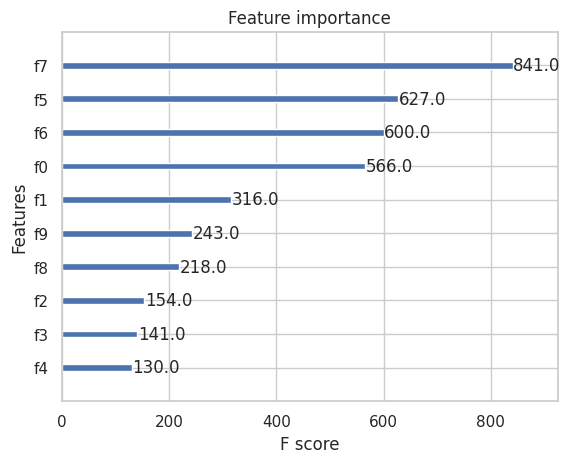

In [127]:
from xgboost import plot_importance
# plot feature importance
plot_importance(model)
plt.show()



*   f0 = age
*   f1 = job
*   f2 = marital
*   f3 = education_qual
*   f4 = call_type
*   f5 = day
*   f6 = mon
*   f7 = dur
*   f8 = num_calls
*   f9 = prev_outcome

# **Summary**

1. The AUROC Score for Logistic Regression model is : 0.903046185503331
2. The AUROC Score for KNN model is : 0.8947538320510937
3. The AUROC Score for Decision tree model is:  0.500062719518314
4. The AUROC Score for Random forest model is:  0.8900261063394471
5. The AUROC Score for XG Boost model is:  0.9316626551207995

Hence, XG Boost model performs better than other models. As already told in the EDA, duration plays a major role as higher the duration,  greater the customer conversion rate.